# 📋Table of Contents
- [INtroduction](#1)
- [📚 Import Libraries](#2)
- [📖 Read Dataset](#3)
- [Merging Data](#4)
- [😅😅Duplicates Values](#5)
- [EDA](#6)
  - [Categorical](#6.1)
  - [Numerical](#6.2)
- [UNIVariate EDA](#7)
- [BIVARIATE EDA](#8)
- [MULTIVARIATE EDA](#9)
- [I 'm deep enough](#10)
- [REFERENCES](#11)

# <a id = 1>INTRODUCTION

- **HI, LUFICER ,**
- **DATE :- 2/2/24 **

**NOTE :- I'm going to perform EDA only and some prediction also but by lazy way by using lazypredict**

**BUT LET'S HAVE SOME CONTEXT OF FEATURES HERE, INFORMATION OF THE FEATURES IS GIVEN BELOW:-**

*Attribute Information:*..
1. The attributes related with eating habits are: 
- **FAVC**: Frequent consumption of high caloric food,
- **FCVC**: Frequency of consumption of vegetables,
- **NCP**: Number of main meals,
- **CAEC**: Consumption of food between meals,
- **CH20**: Consumption of water daily,
- **CALC**: Consumption of alcohol.
2. The attributes related with the physical condition are: 
- **SCC**: Calories consumption monitoring,
- ***FAF**: Physical activity frequency,
- **TUE**: Time using technology devices,
- **MTRANS**: 
3. Transportation used variables obtained : 
- **Gender**,
- **Age**,
- **Height** and
- **Weight**.

*NObesity values are:*
- **Underweight: Less than 18.5**
- **Normal: 18.5 to 24.9**
- **Overweight: 25.0 to 29.9**
- **Obesity I: 30.0 to 34.9**
- **Obesity II: 35.0 to 39.9**
- **Obesity III: Higher than 40**

# <a id = 2>📚 Import Libraries

In [1]:
!pip install lazypredict

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import set_config
import matplotlib.colors as mcolors
from IPython.core.display import HTML
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

sns.set_theme(style = 'white')

set_config(transform_output = 'pandas')

In [3]:
# It is for styling here only
# Define custom CSS directly in Python variable
custom_css = """
<style>
  :root {
    --header1_color: #204709;
    --header2_color: #42841F;
    --header3_color: #6EAF4B;
    --keyword_color: #cc241d; /* import */
    --string_color: #79740e;
    --number_color: #b16286;
    --def_color: #689d6a; /* class name */
    --property_color: #458588; /* python properties */
    --builtin_color: #689d6a;
    --comment_color: #9f9f9f;
    --comment_color_2: #458588; /* equals sign */
    --operator_color: #a221f2;
    --font_color: #3c3836; /* general font */
    --variable2_color: #b16286; /*self keyworda */
    --box_color: #fffdee66;
  }

  /* Add the following style for headers with background color */
  h1,
  .h1 {
    font-family: "Trebuchet MS", sans-serif;
    font-size: 2em !important;
    letter-spacing: 1px;
    color: var(--header1_color);
    border-bottom: 3px solid var(--header1_color);
    background-color: #000080;
    padding: 0.5em;
    color: #ffff00;
  }

  h2,
  .h2 {
    font-family: "Trebuchet MS";
    font-size: 1.7em !important;
    color: var(--header2_color);
    background-color: #000080;
    padding: 0.5em;
    color: #ffff00;
  }

  h3,
  .h3 {
    font-family: "Trebuchet MS";
    font-size: 1.4em !important;
    color: var(--header3_color);
    background-color: #000080;
    padding: 0.5em;
    color: #ffff00;
  }

  /* Rest of your existing styles... */

  body[data-jp-theme-light="true"] .jp-Notebook .CodeMirror.cm-s-jupyter {
    background-color: var(--box_color) !important;
  }

  div.input_area {
    background-color: var(--box_color) !important;
  }
</style>

"""

# Apply custom CSS
HTML(custom_css)

# <a id = 3>📖 Read Dataset

In [4]:
samp = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
train = pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")
main = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

In [5]:
train.drop('id', inplace = True, axis = 1)

# <a id = 4>Merging data

In [6]:
print(main.shape, train.shape)
train = pd.concat([train, main], axis = 0)
train.shape

(2111, 17) (20758, 17)


(22869, 17)

# <a id = 5>😅😅Duplicate Values

In [7]:
# Remove duplicated rows
print(train.duplicated().sum())
train = train.drop_duplicates()

24


In [8]:
# Replace for Inf values to Nan, trust me it's better to handle to nan
train = train.replace([np.inf, -np.inf], np.nan)

# <a id = 6>EDA

In [9]:
# Doing simple EDA of the data
desc = pd.DataFrame(index = list(train))
desc['type'] = train.dtypes
desc['count'] = train.count()
desc['nunique'] = train.nunique()
desc['%unique'] = desc['nunique'] / len(train) * 100
desc['null'] = train.isnull().sum()
desc['%null'] = desc['null'] / len(train) * 100
desc['Nan'] = train.isna().sum()
desc['%Nan'] = desc['Nan'] / len(train) *100
desc['min'] = train.min()
desc['max'] = train.max()
print('The number of the categorical(object) and numerical(float64) columns:',desc['type'].value_counts())
desc

The number of the categorical(object) and numerical(float64) columns: type
object     9
float64    8
Name: count, dtype: int64


type  count  nunique  %unique  null  %null  \
Gender                           object  22845        2     0.01     0   0.00   
Age                             float64  22845     1739     7.61     0   0.00   
Height                          float64  22845     1862     8.15     0   0.00   
Weight                          float64  22845     2014     8.82     0   0.00   
family_history_with_overweight   object  22845        2     0.01     0   0.00   
FAVC                             object  22845        2     0.01     0   0.00   
FCVC                            float64  22845      975     4.27     0   0.00   
NCP                             float64  22845      740     3.24     0   0.00   
CAEC                             object  22845        4     0.02     0   0.00   
SMOKE                            object  22845        2     0.01     0   0.00   
CH2O                            float64  22845     1568     6.86     0   0.00   
SCC                              object  22845        2     0.01     0   0.00   
FAF                             float64  22845     1408     6.16     0   0.00   
TUE                             float64  22845     1329     5.82     0   0.00   
CALC                             object  22845        4     0.02     0   0.00   
MTRANS                           object  22845        5     0.02     0   0.00   
NObeyesdad                       object  22845        7     0.03     0   0.00   

                                Nan  %Nan                  min  \
Gender                            0  0.00               Female   
Age                               0  0.00                14.00   
Height                            0  0.00                 1.45   
Weight                            0  0.00                39.00   
family_history_with_overweight    0  0.00                   no   
FAVC                              0  0.00                   no   
FCVC                              0  0.00                 1.00   
NCP                               0  0.00                 1.00   
CAEC                              0  0.00               Always   
SMOKE                             0  0.00                   no   
CH2O                              0  0.00                 1.00   
SCC                               0  0.00                   no   
FAF                               0  0.00                 0.00   
TUE                               0  0.00                 0.00   
CALC                              0  0.00               Always   
MTRANS                            0  0.00           Automobile   
NObeyesdad                        0  0.00  Insufficient_Weight   

                                                max  
Gender                                         Male  
Age                                           61.00  
Height                                         1.98  
Weight                                       173.00  
family_history_with_overweight                  yes  
FAVC                                            yes  
FCVC                                           3.00  
NCP                                            4.00  
CAEC                                             no  
SMOKE                                           yes  
CH2O                                           3.00  
SCC                                             yes  
FAF                                            3.00  
TUE                                            2.00  
CALC                                             no  
MTRANS                                      Walking  
NObeyesdad                      Overweight_Level_II

**GREAT, NO NULL VALUES, NO NAN VALUES , SUPER GREAT, let's go deeper**

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F13967881%2Fe5e14d896ea519e3b2fe4ba90a956ba8%2F0_y8AuUHSoTGRqX40h.jpg?generation=1705806626959794&alt=media)
# <a id = 7>UNIVARIATE EDA(THIS EDA is not enough)

# <a id = 6.1>Categorical EDA

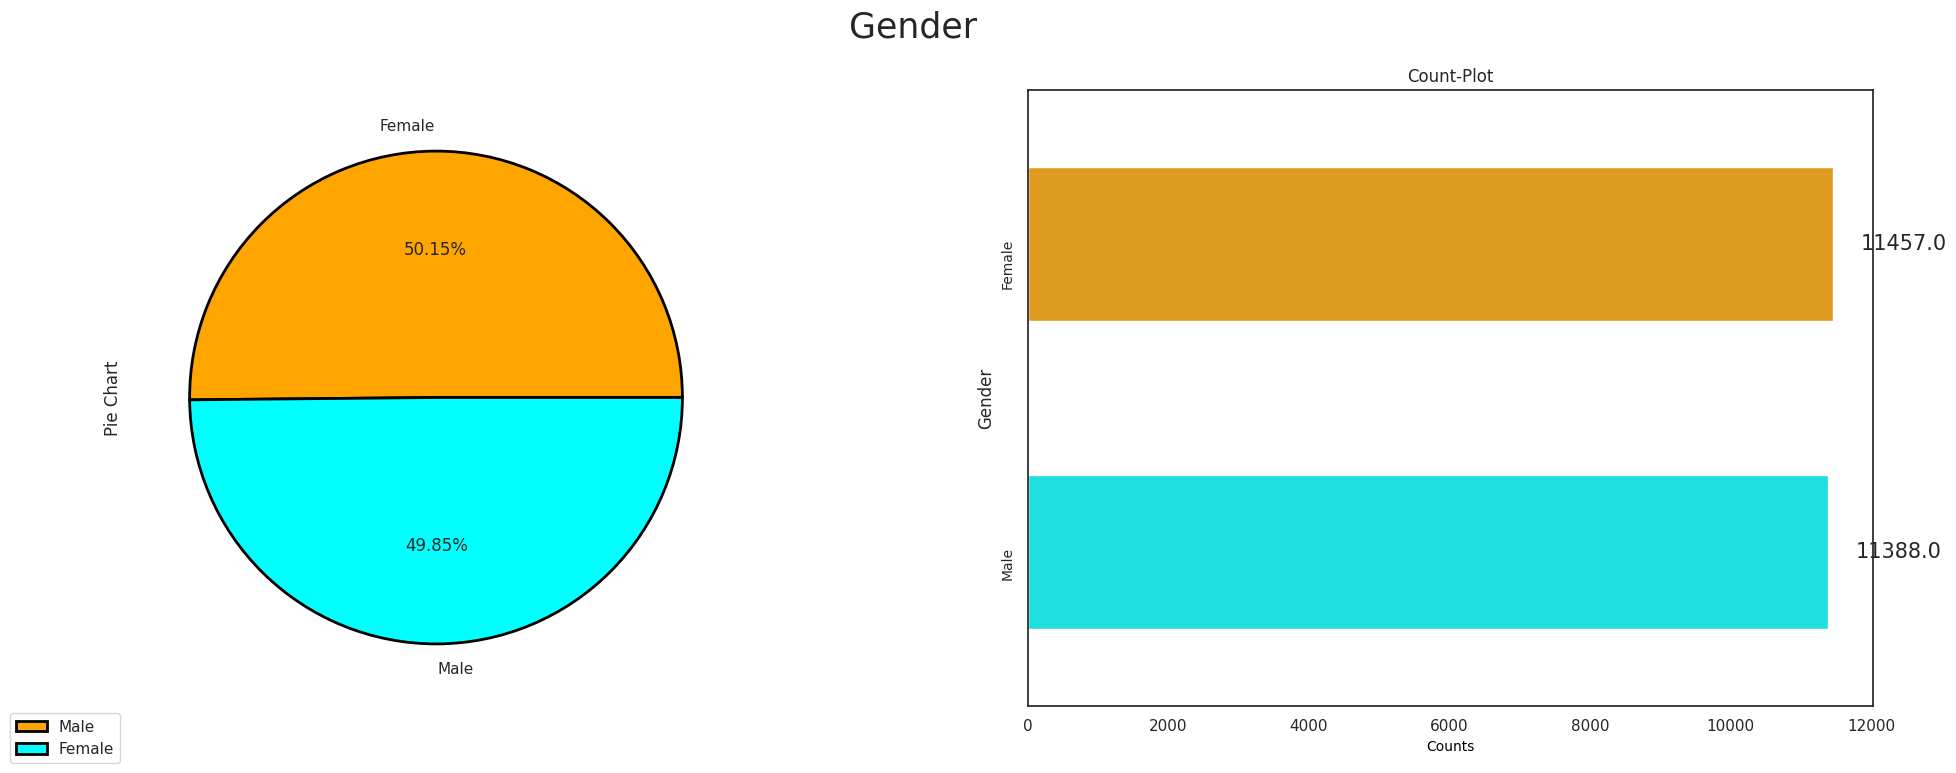

********************************************************************************************************************************************************************************************************


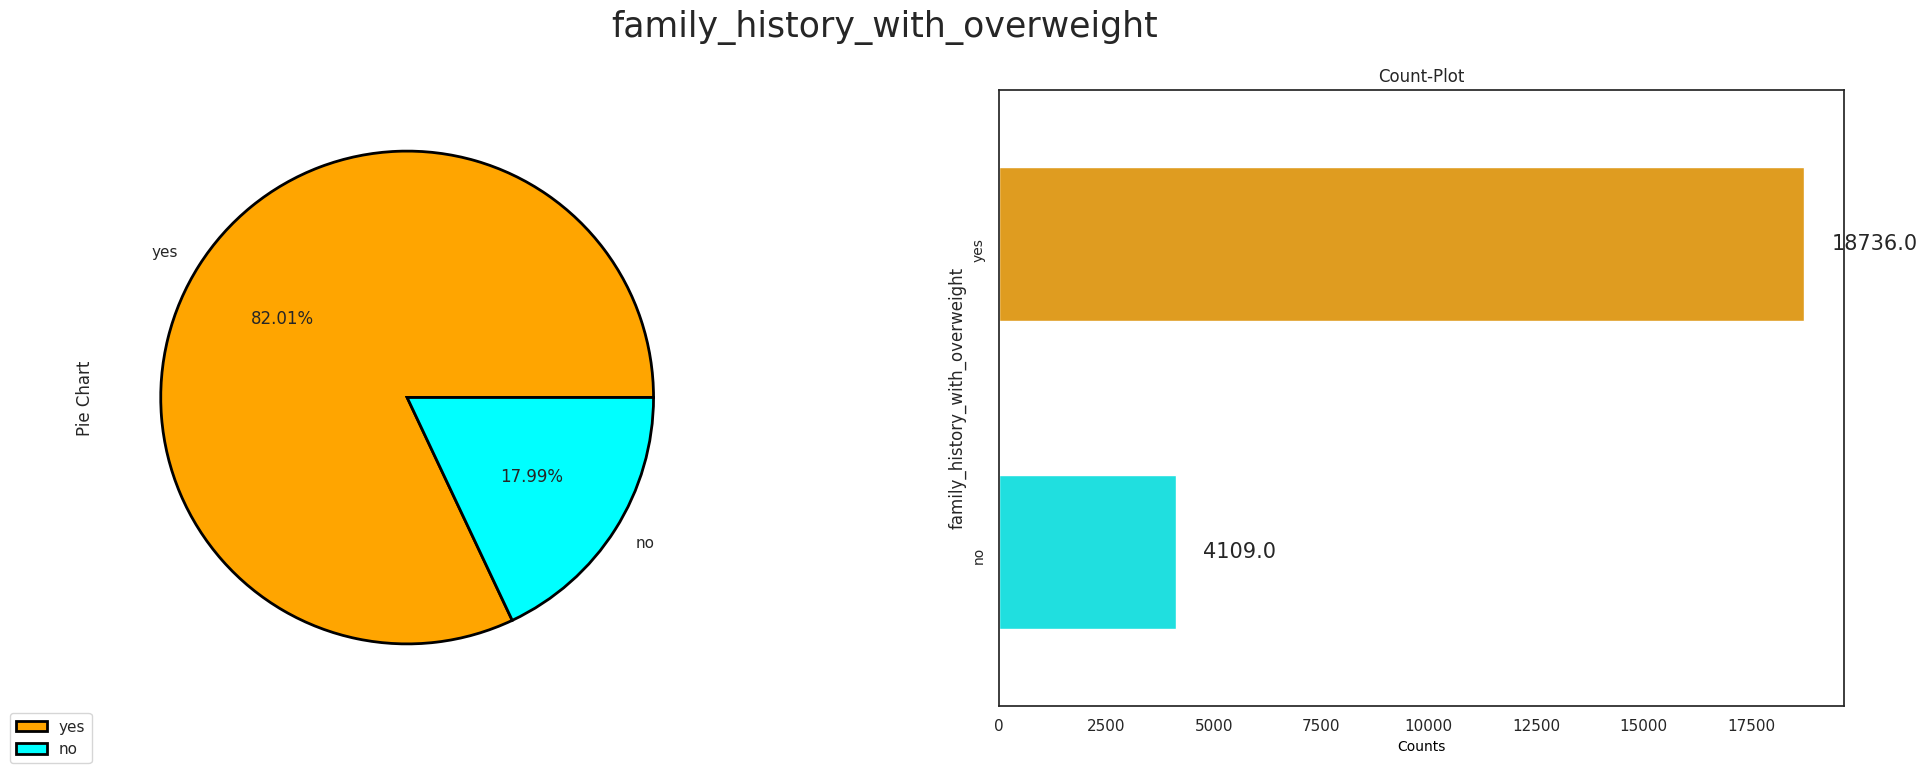

********************************************************************************************************************************************************************************************************


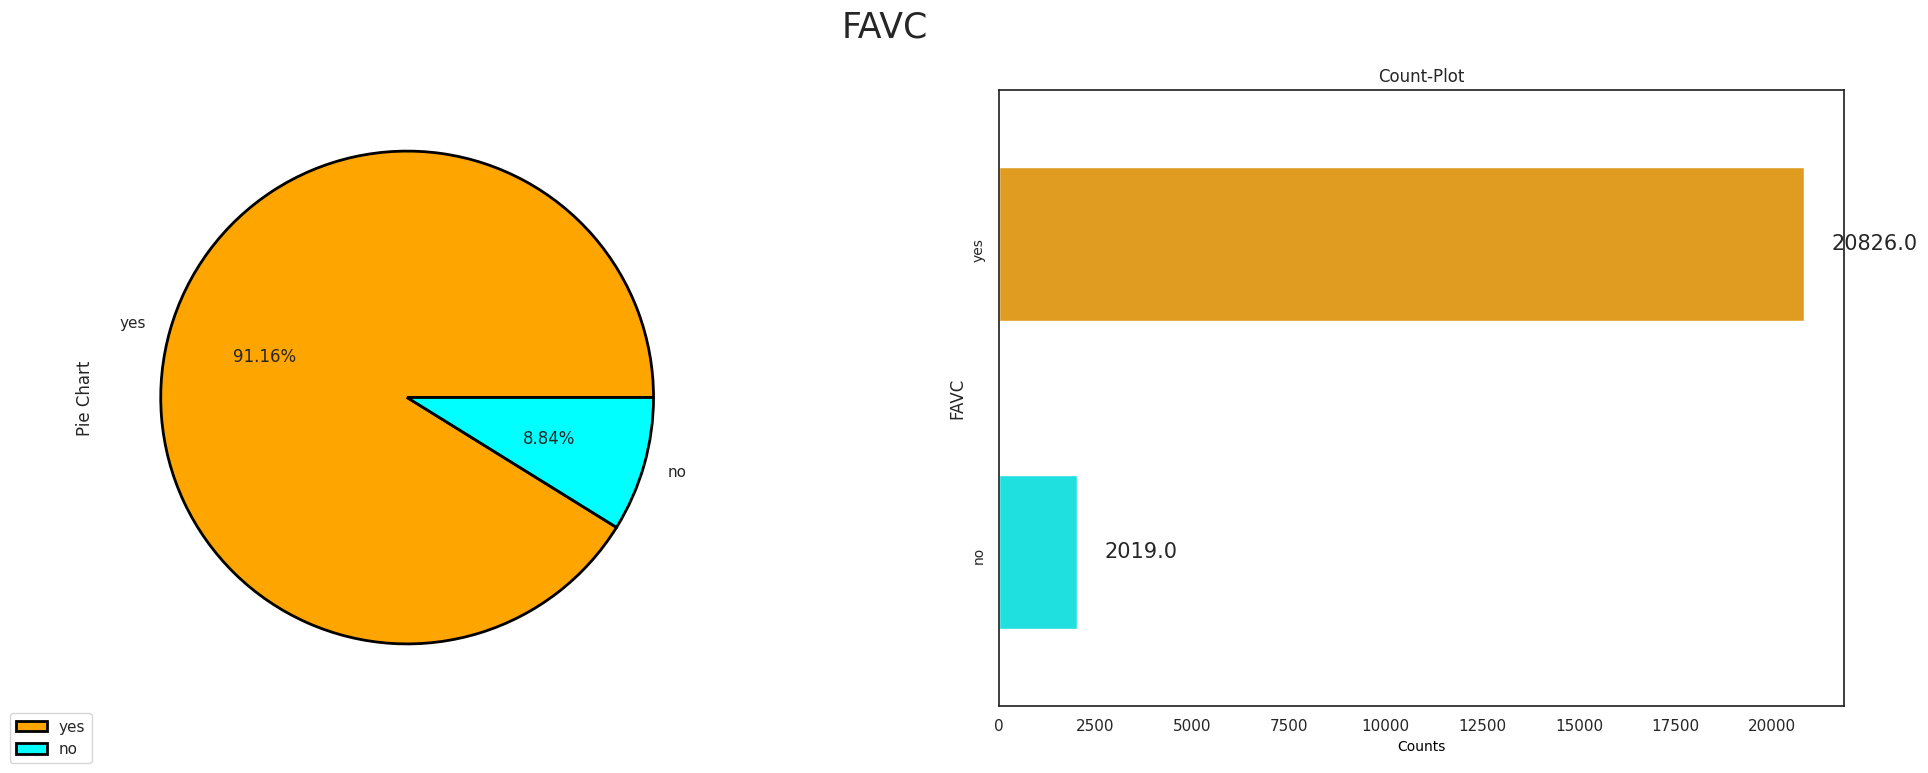

********************************************************************************************************************************************************************************************************


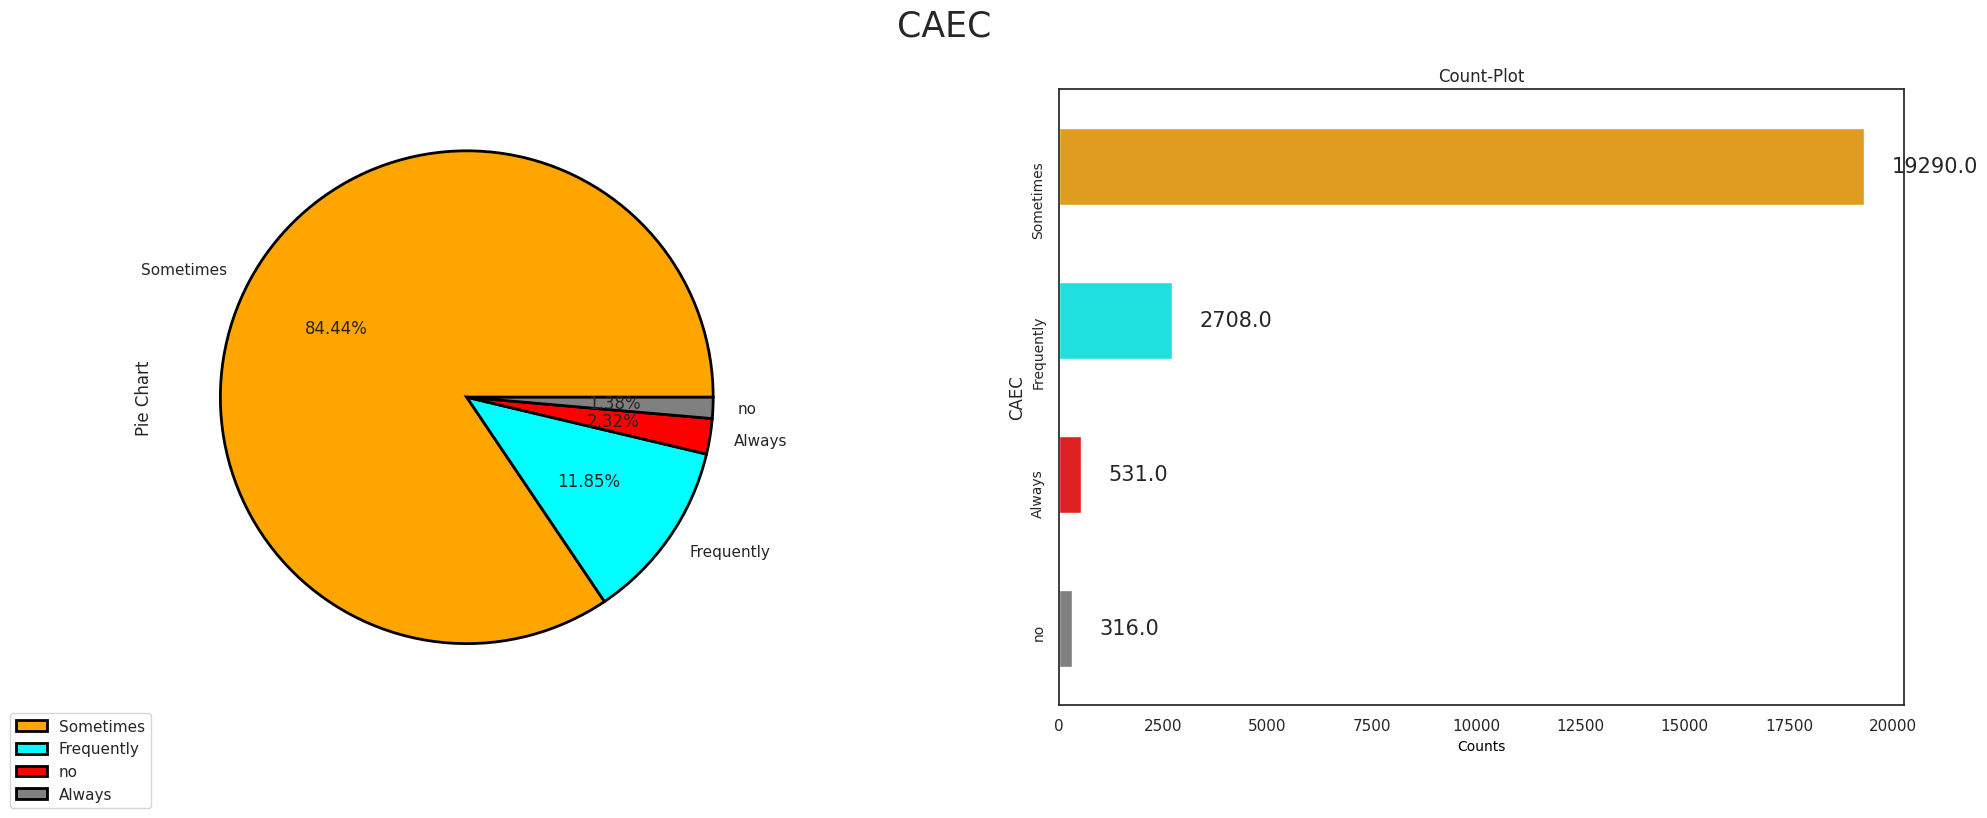

********************************************************************************************************************************************************************************************************


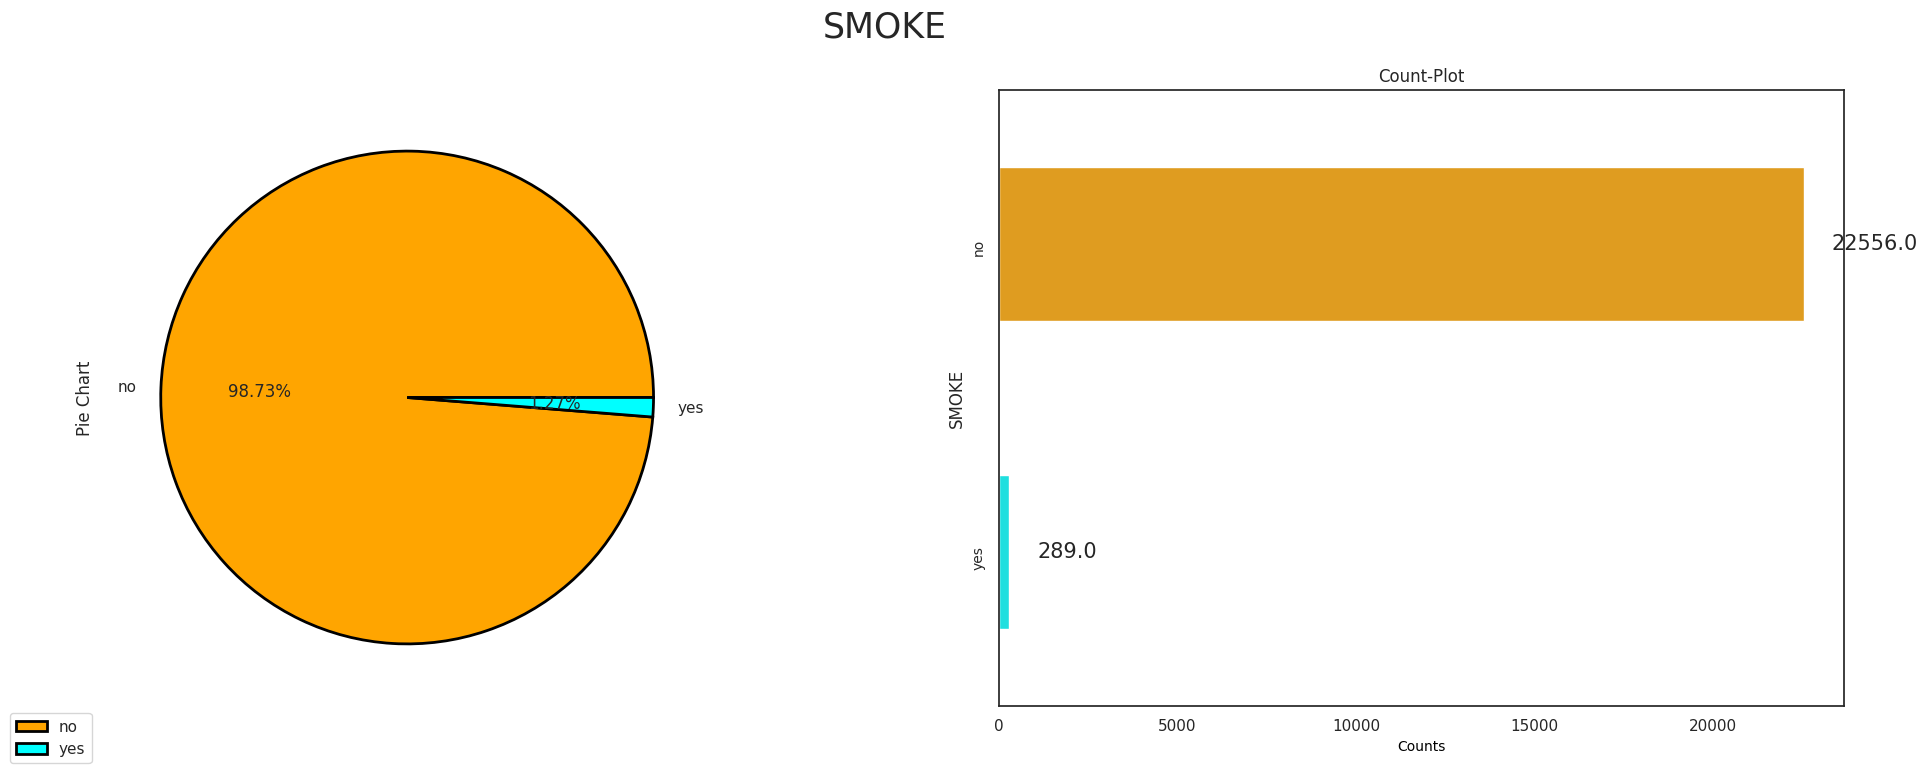

********************************************************************************************************************************************************************************************************


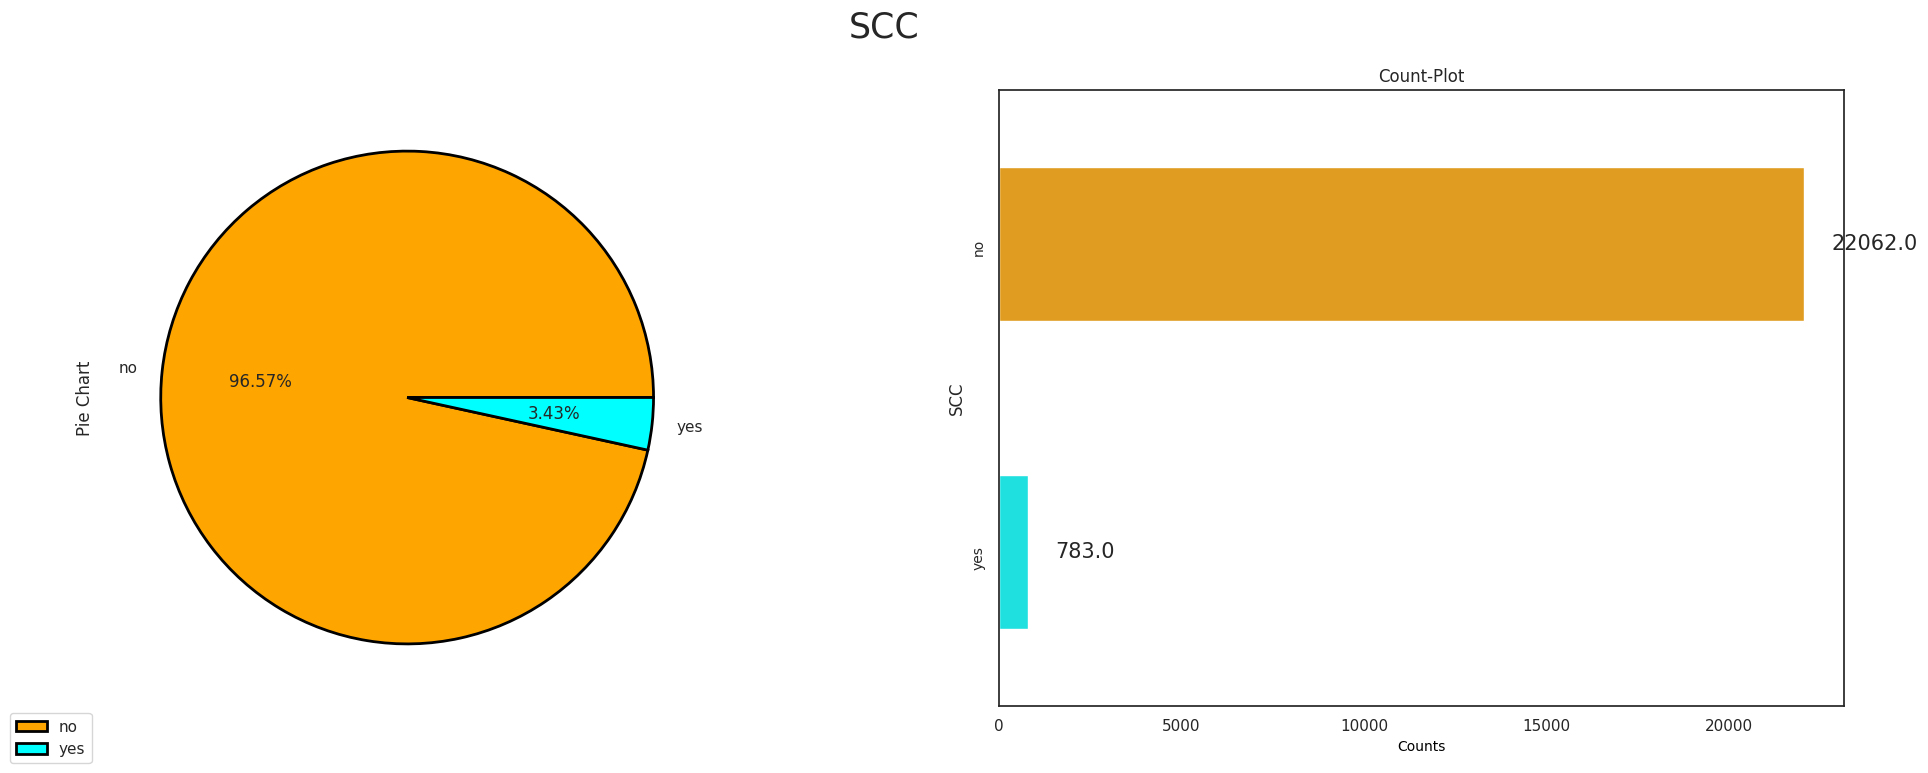

********************************************************************************************************************************************************************************************************


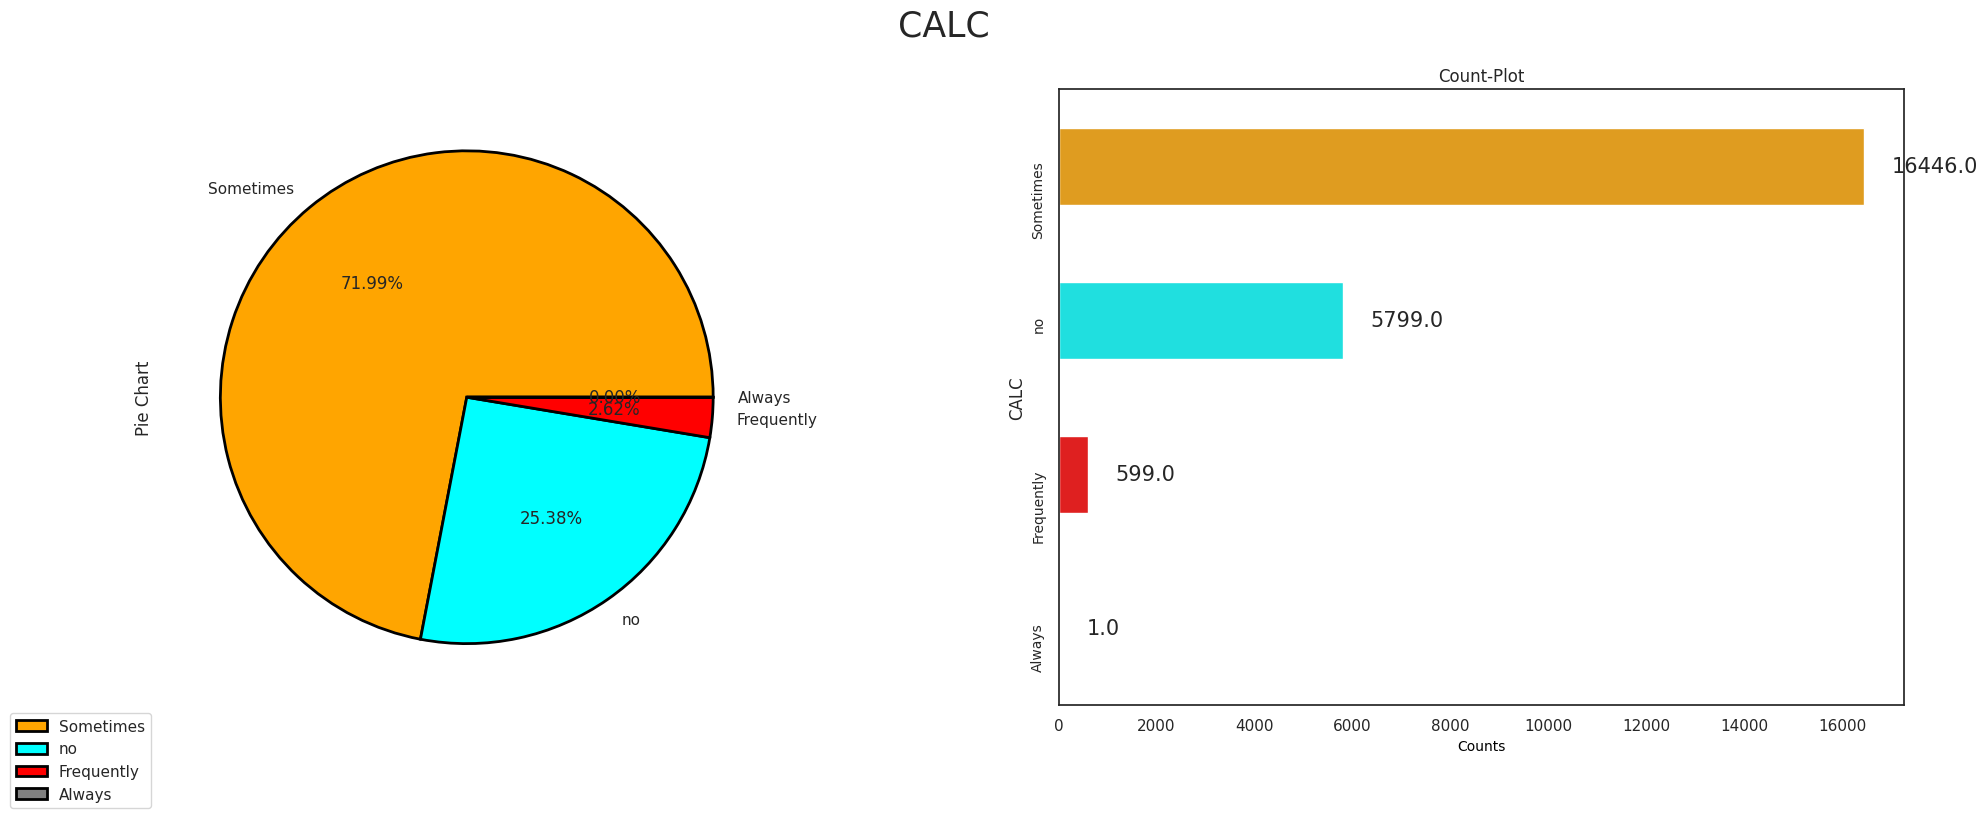

********************************************************************************************************************************************************************************************************


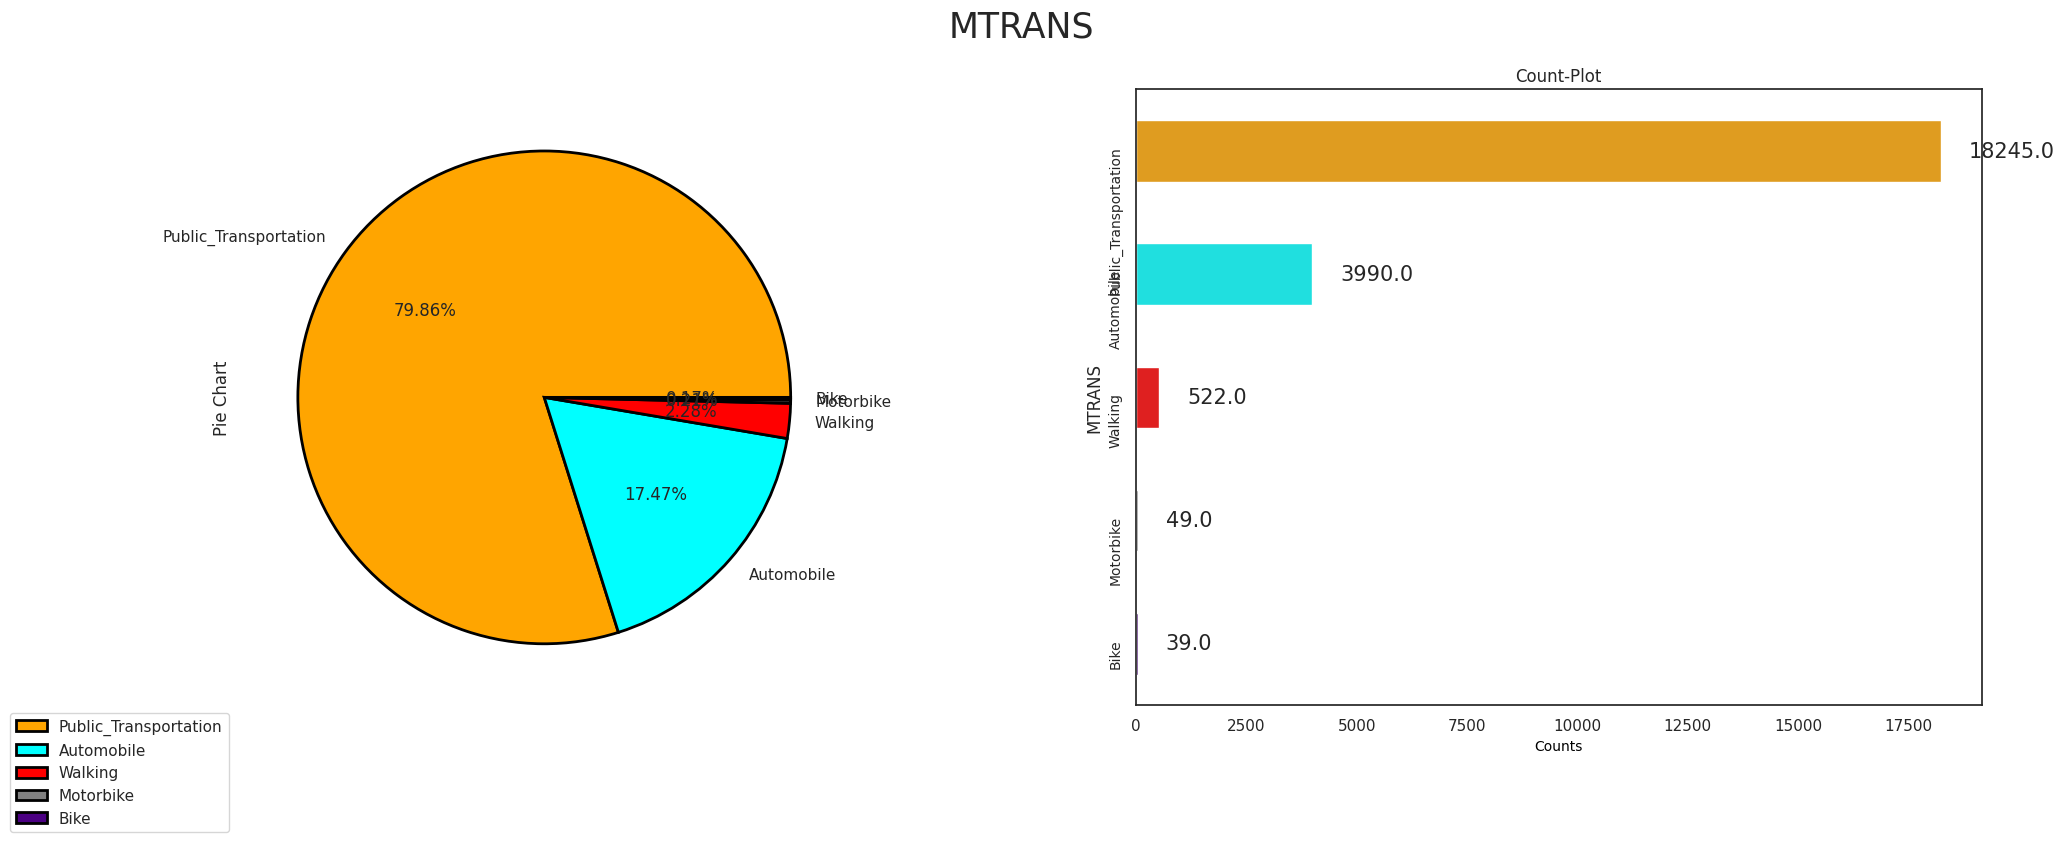

********************************************************************************************************************************************************************************************************


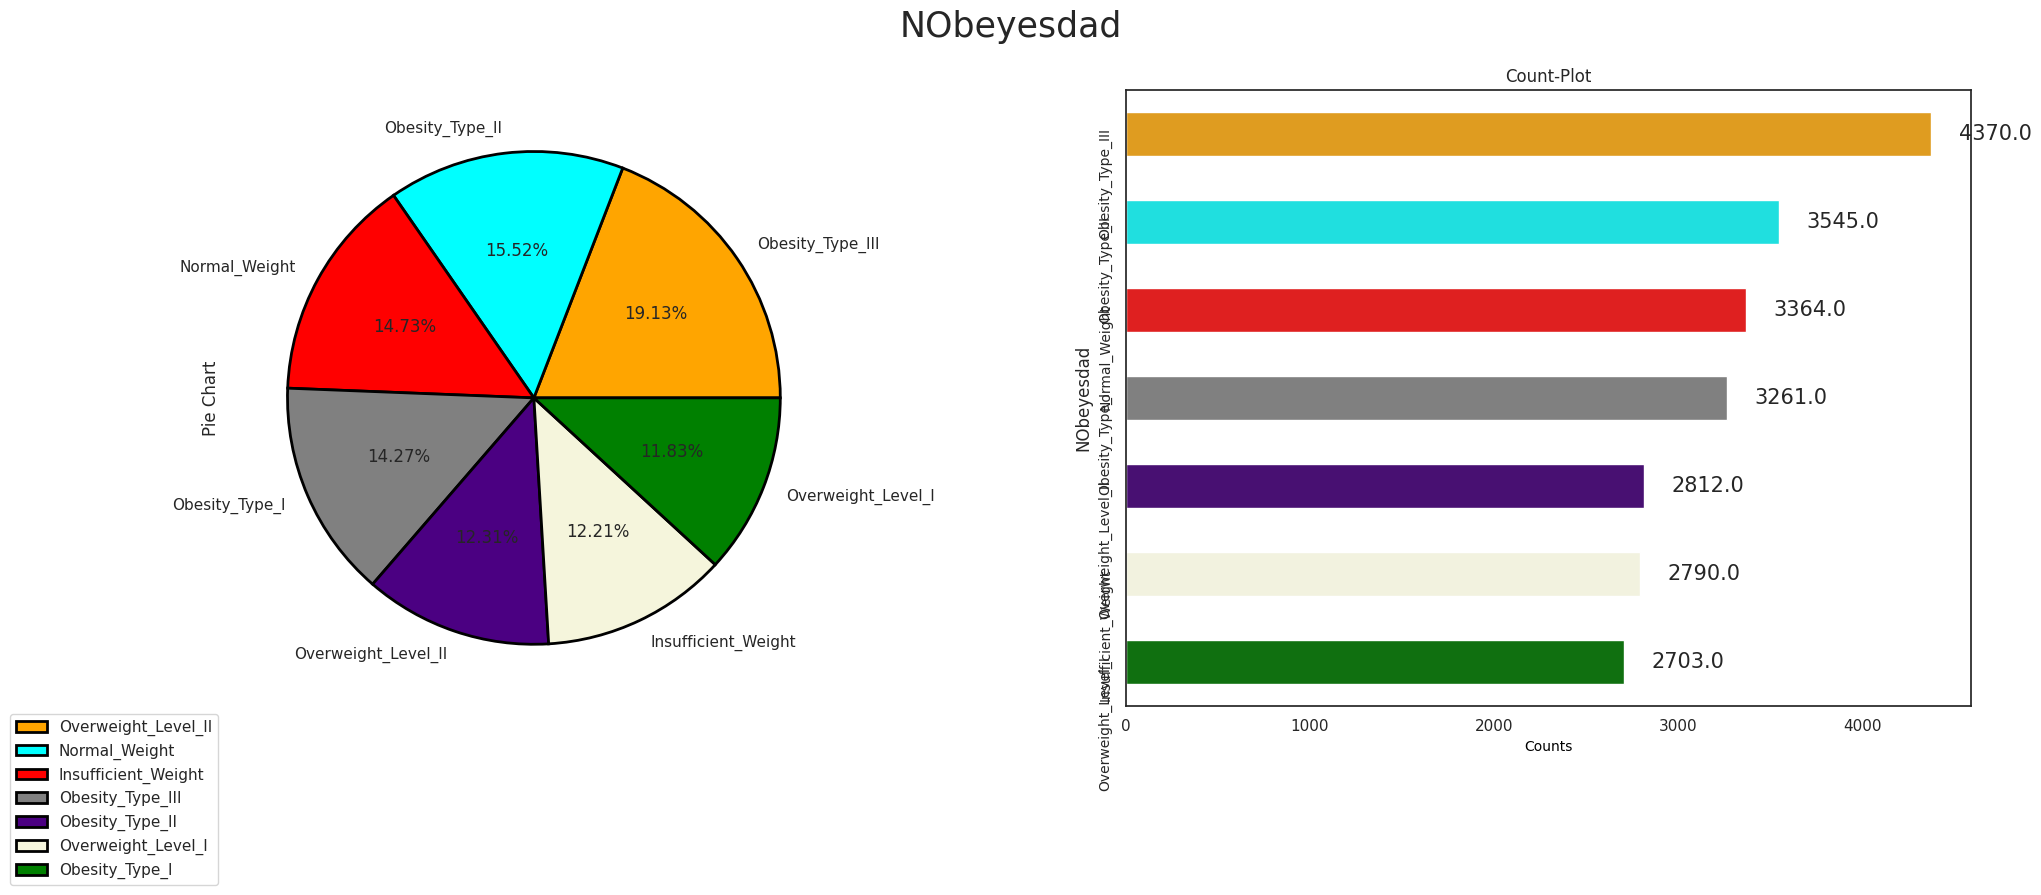

********************************************************************************************************************************************************************************************************


In [10]:
# This code gives EDA for whole Categorical columns of the data by pie chart and countplot
data = train.copy()
col = data.select_dtypes(include=['object']).columns

for i in col:
    f,ax=plt.subplots(1,2,figsize=(24,8))
    colors = ["orange", "cyan", "red", "grey", "indigo", "beige", "green"]
    rgb_colors = [mcolors.to_rgb(color) for color in colors]
    wp = {'linewidth': 2, 'edgecolor': "black"}
    labels = data[i].unique()
    
    data[i].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0], colors = colors, wedgeprops=wp)
    ax[0].set_ylabel("Pie Chart")
    ax[0].legend(labels,
          loc="upper right",
          bbox_to_anchor=(0, 0, 0, 0))
    
    sns.countplot(y=i,data=data,ax=ax[1], order=data[i].value_counts().index, width = 0.5, palette= rgb_colors)
    ax[1].set_xlabel("Counts", fontsize=10, color="black")

    # Display frequency values on top of bars
    for p in ax[1].patches:
        ax[1].annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(20, 0), textcoords='offset points', fontsize=15)

    plt.yticks(rotation=90, fontsize=10)
    ax[1].set_title("Count-Plot")
    plt.suptitle(i, size = 25)
    plt.show()
    print('*'*200)

# <a id = 6.2>Numerical EDA

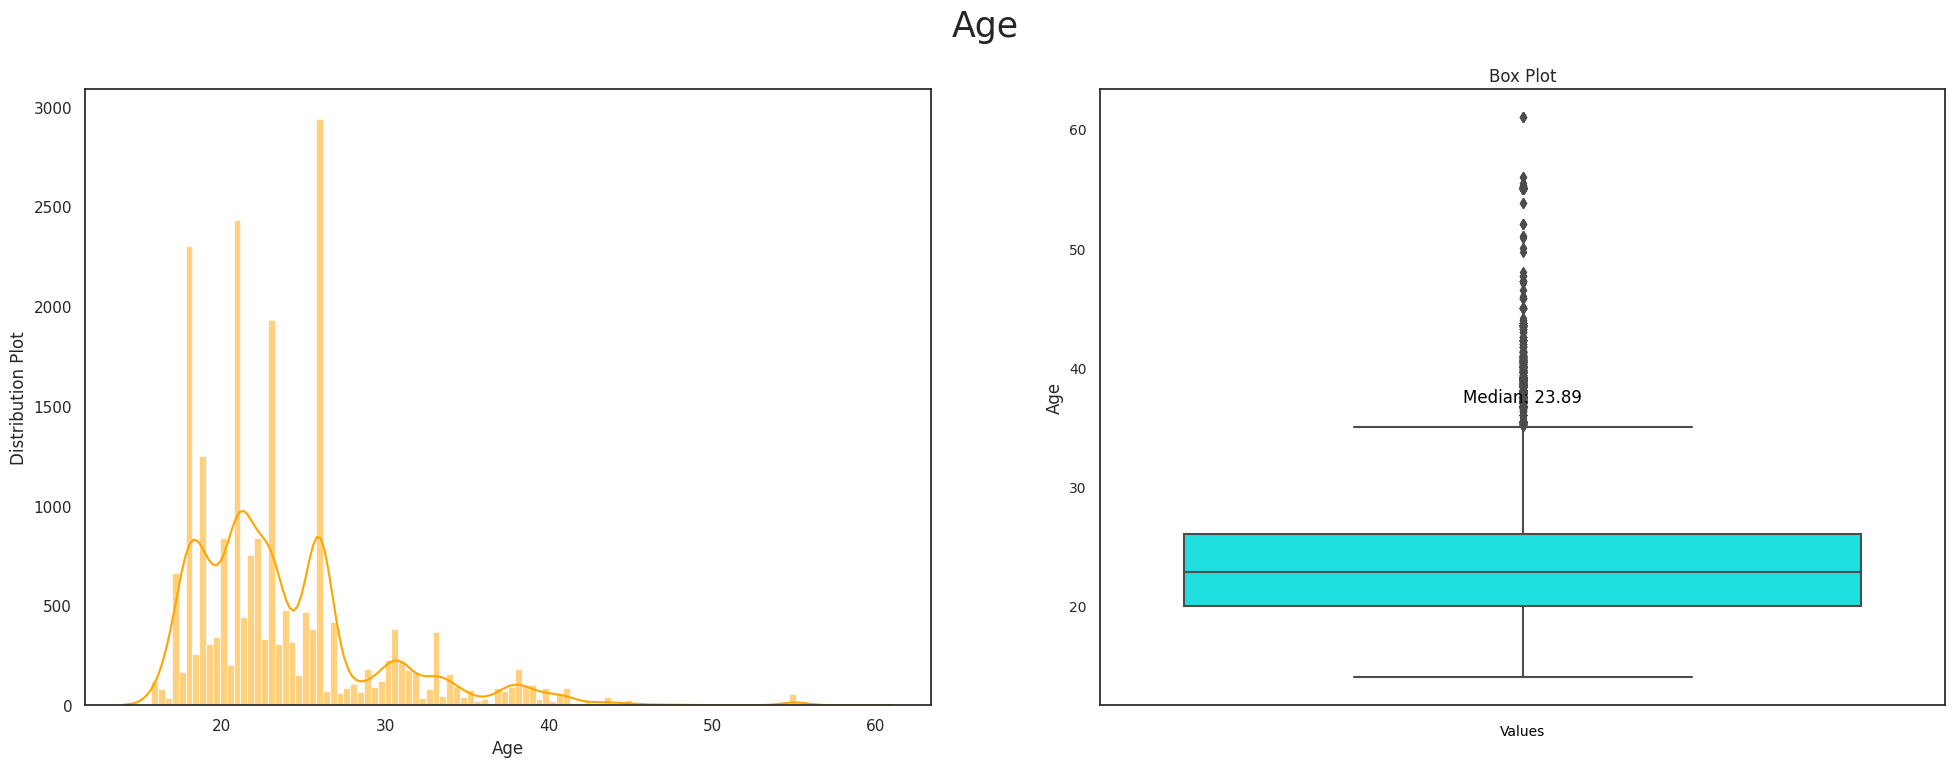

********************************************************************************************************************************************************************************************************


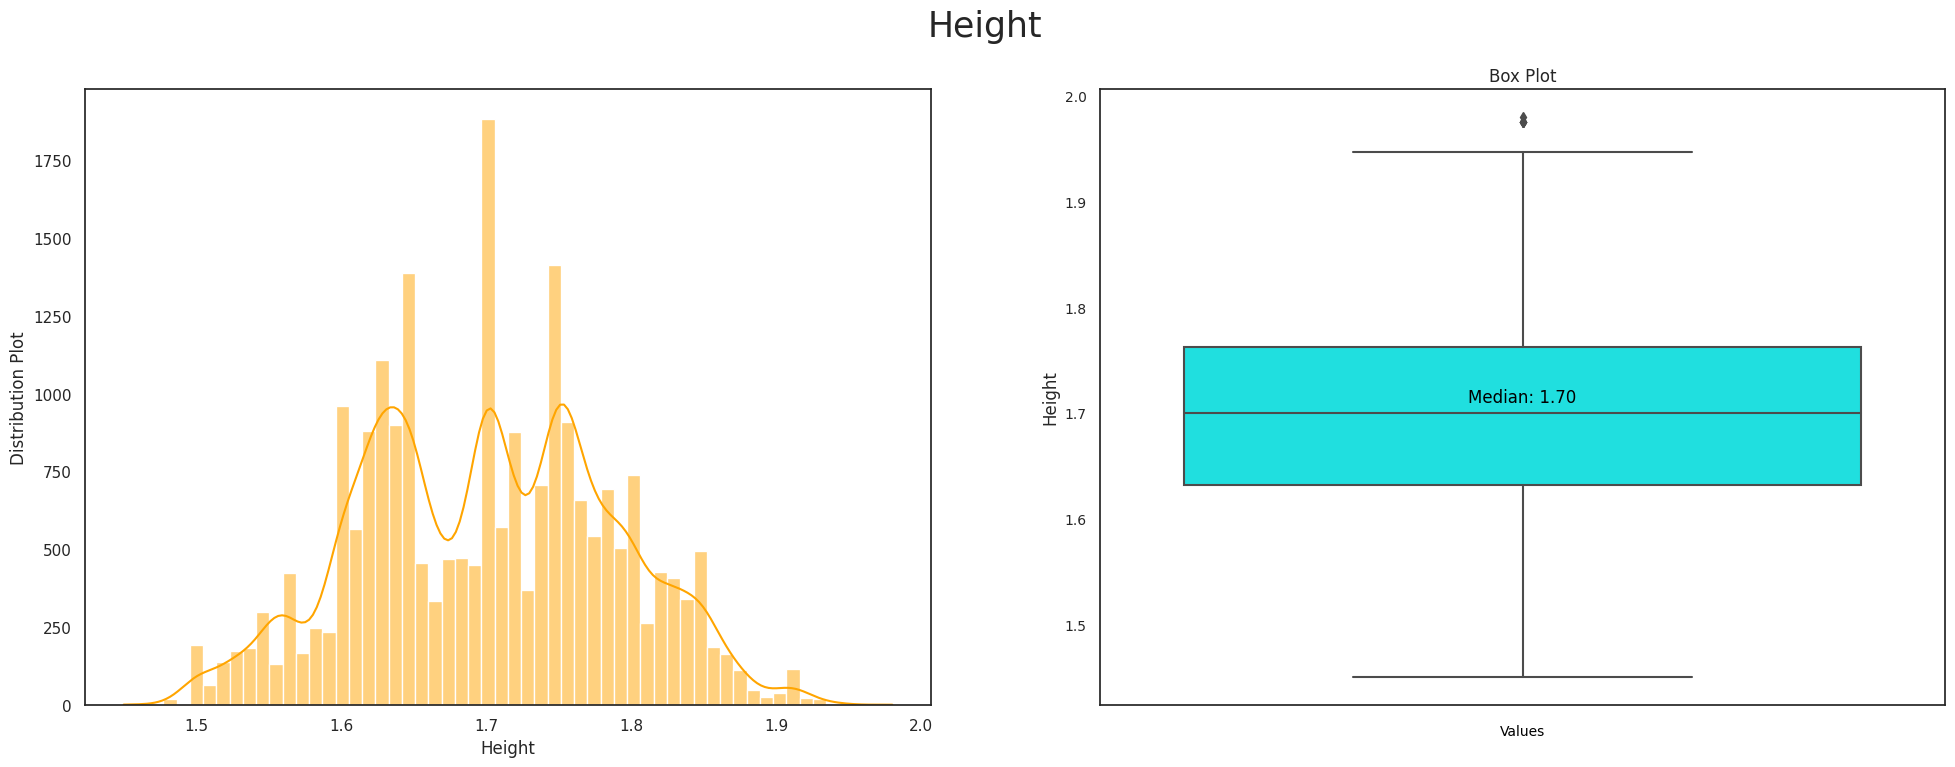

********************************************************************************************************************************************************************************************************


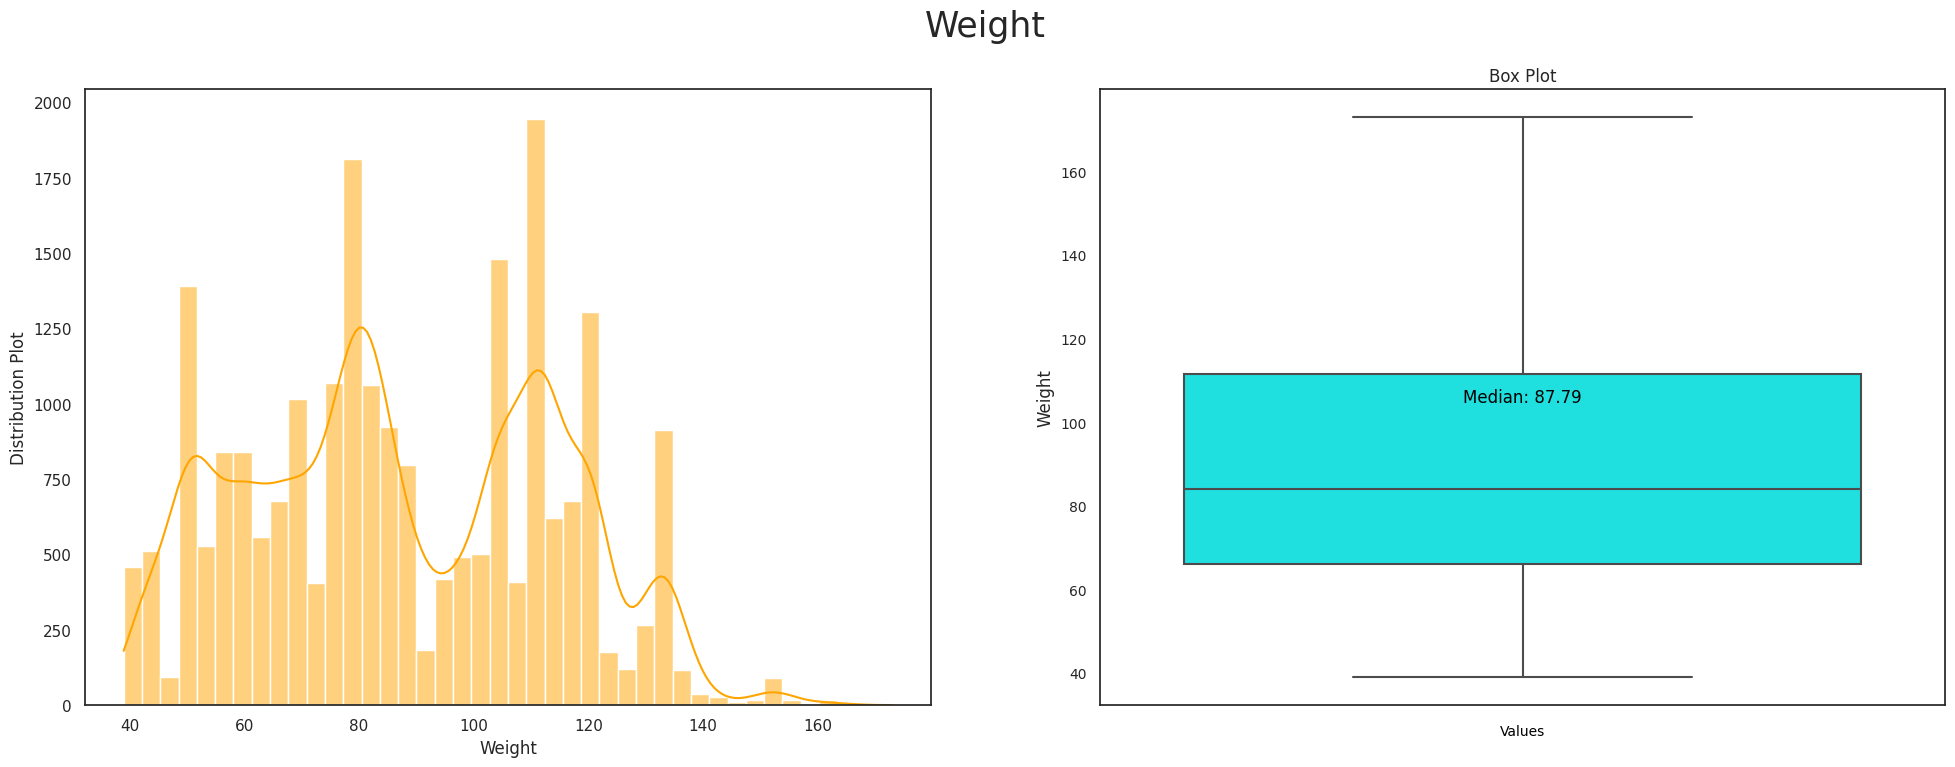

********************************************************************************************************************************************************************************************************


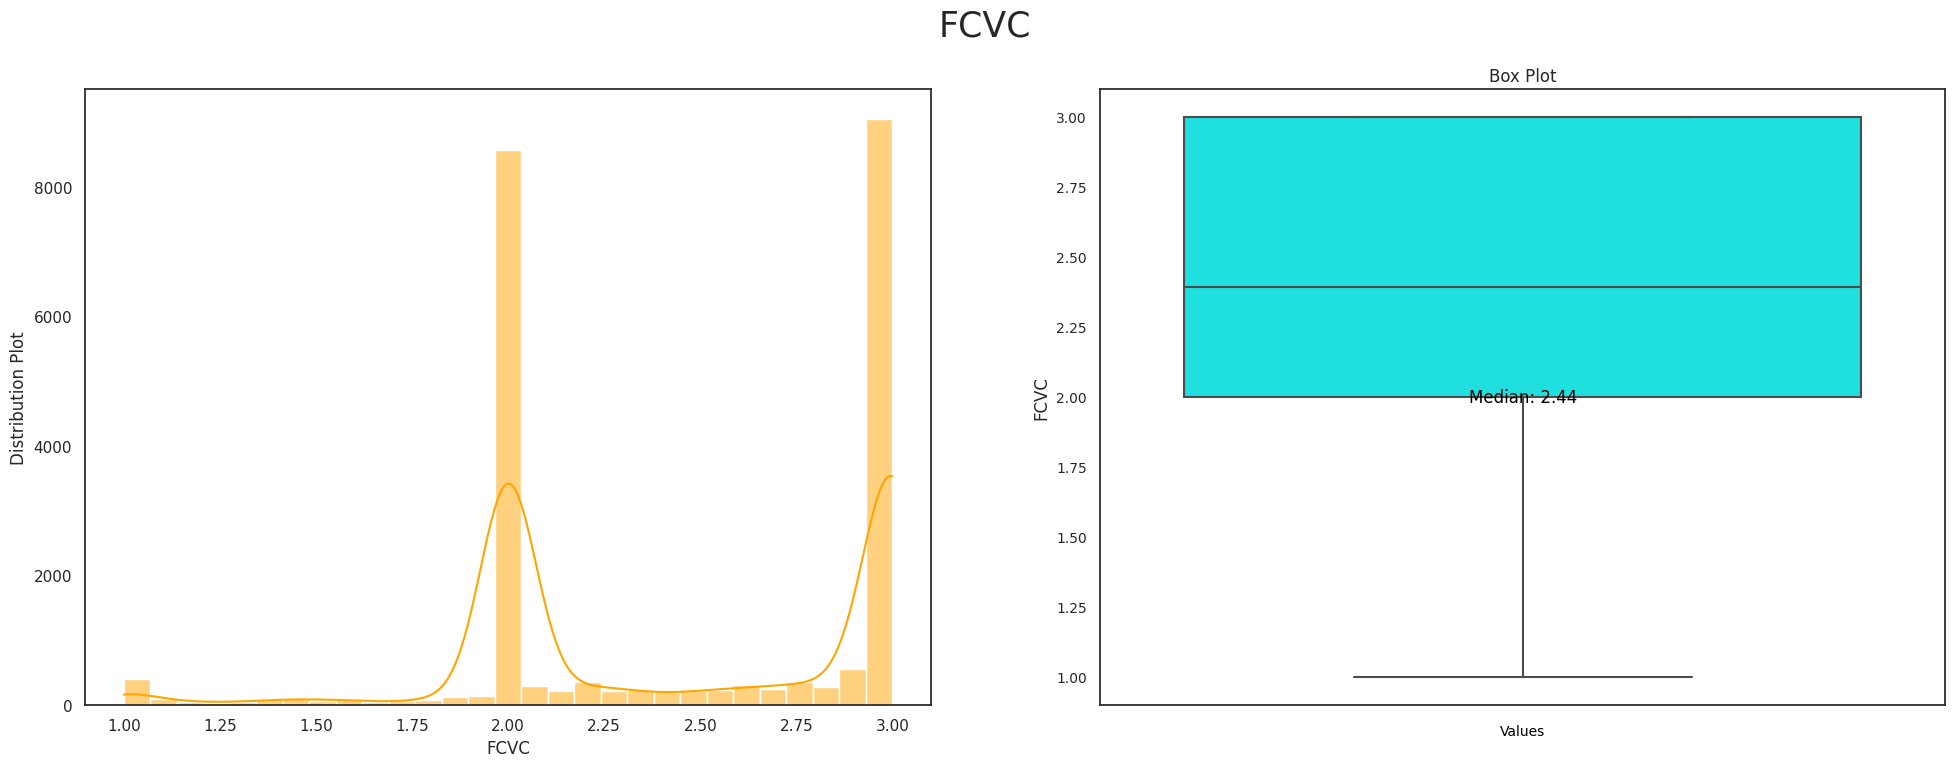

********************************************************************************************************************************************************************************************************


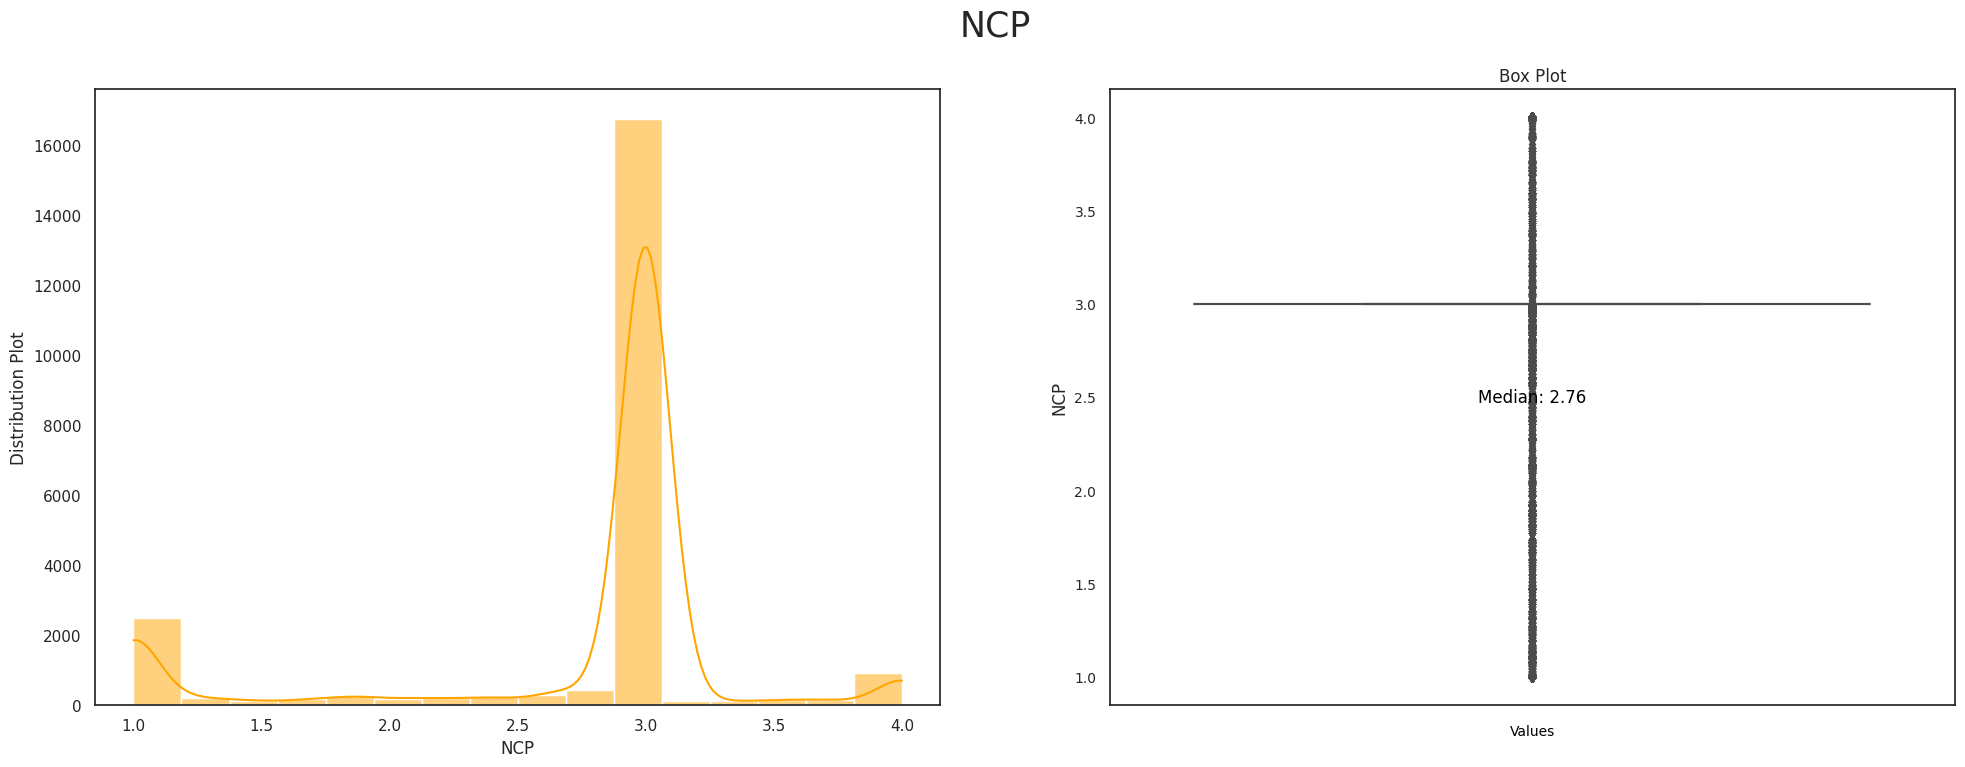

********************************************************************************************************************************************************************************************************


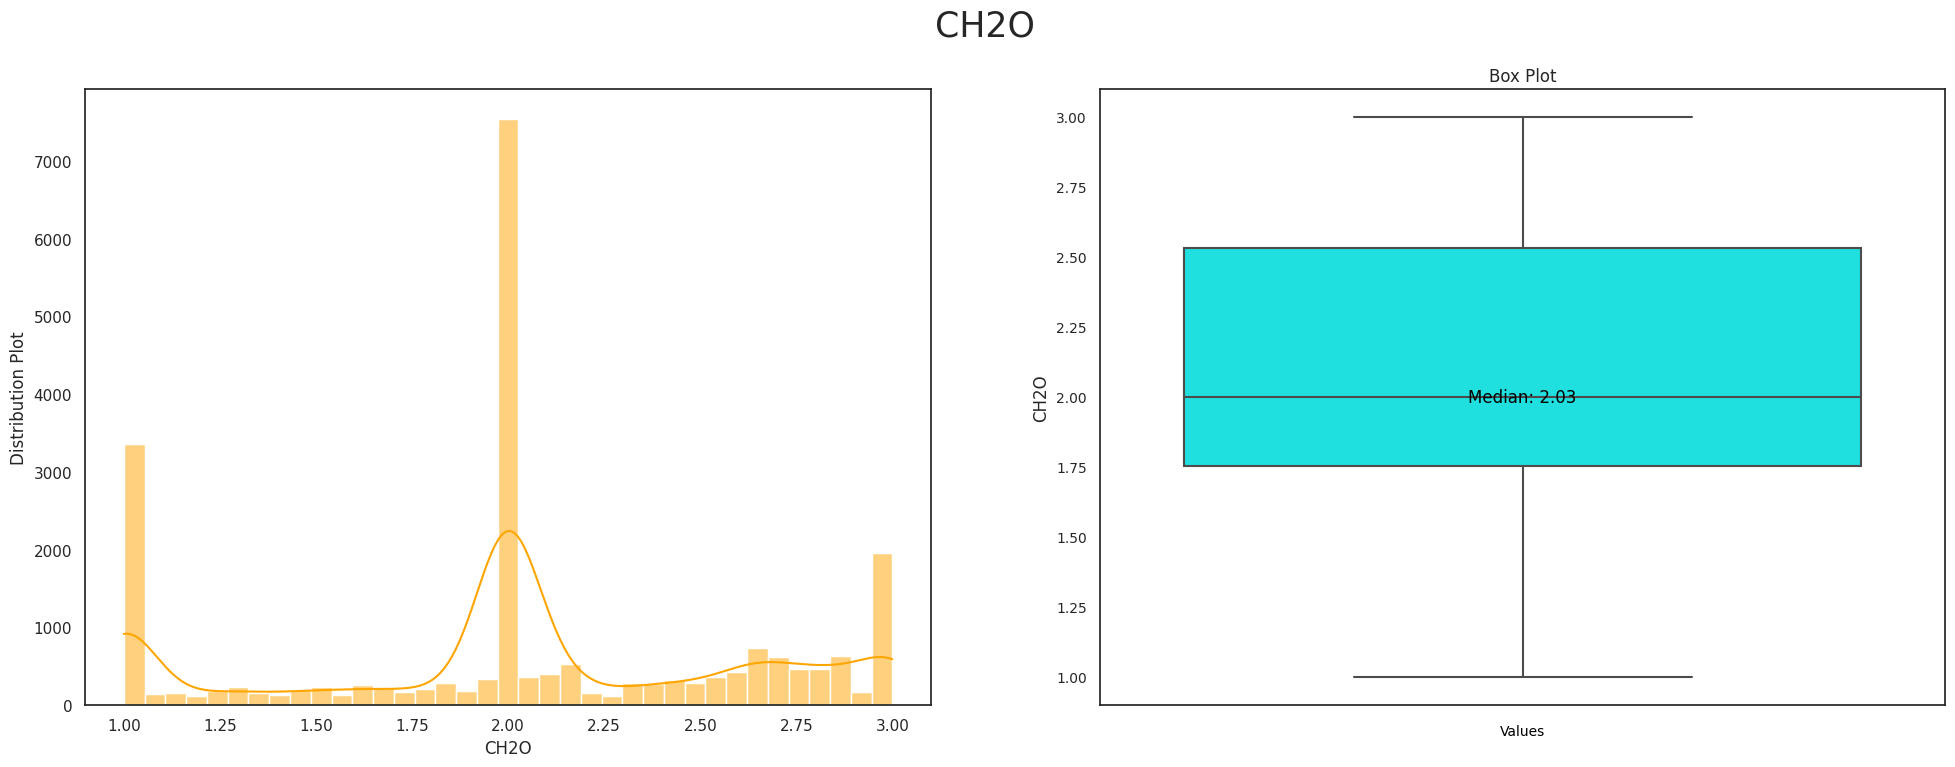

********************************************************************************************************************************************************************************************************


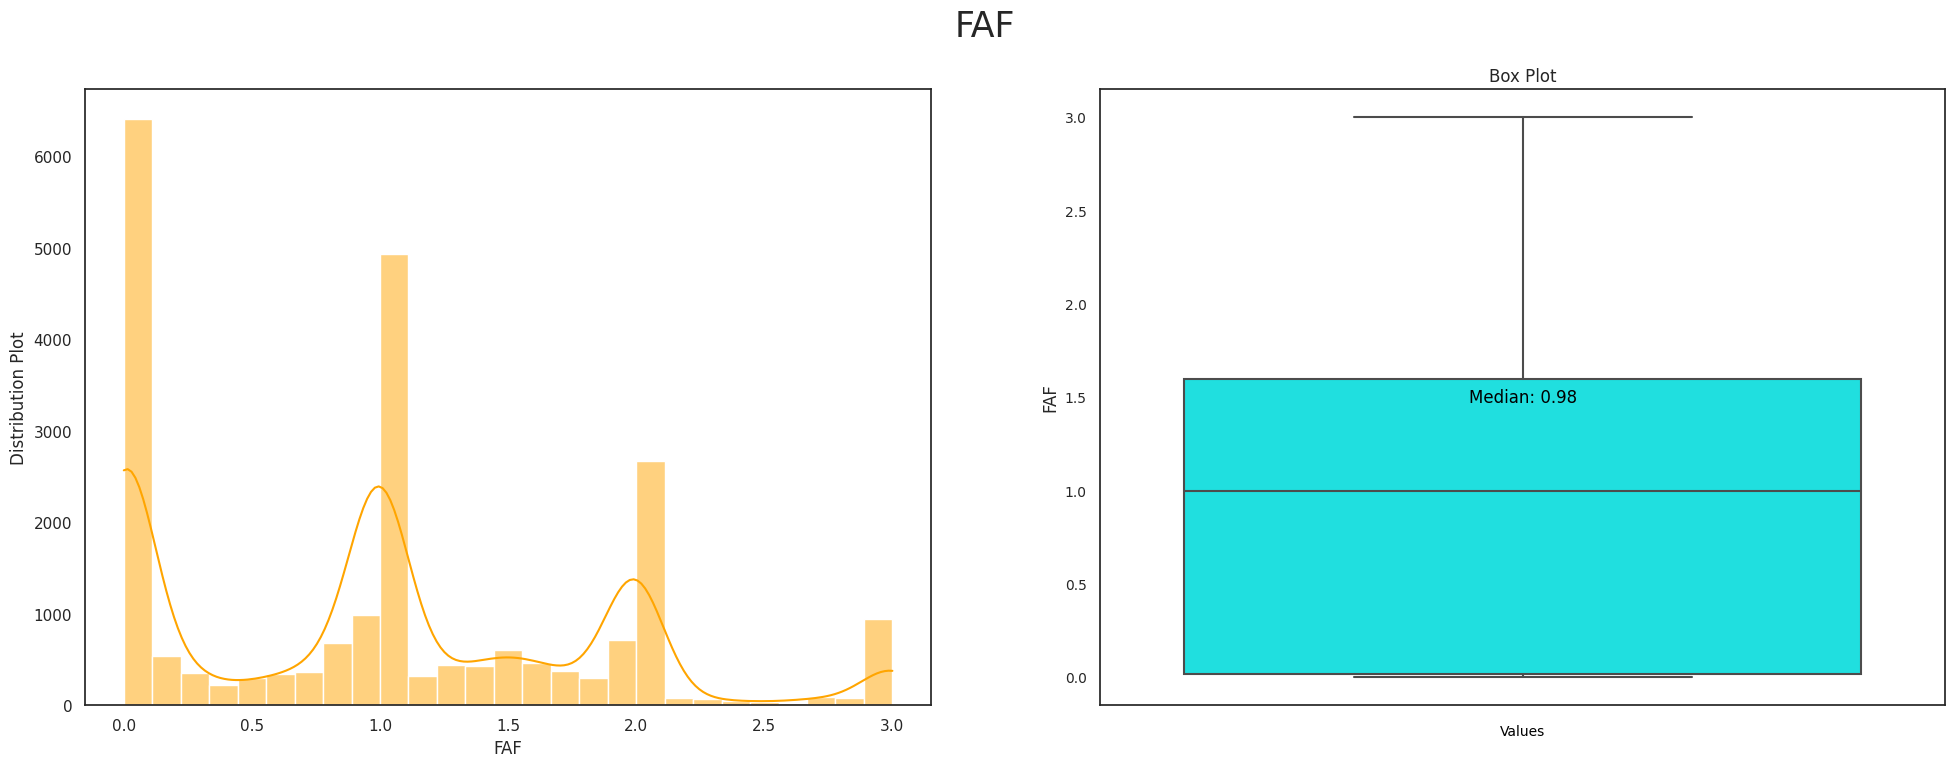

********************************************************************************************************************************************************************************************************


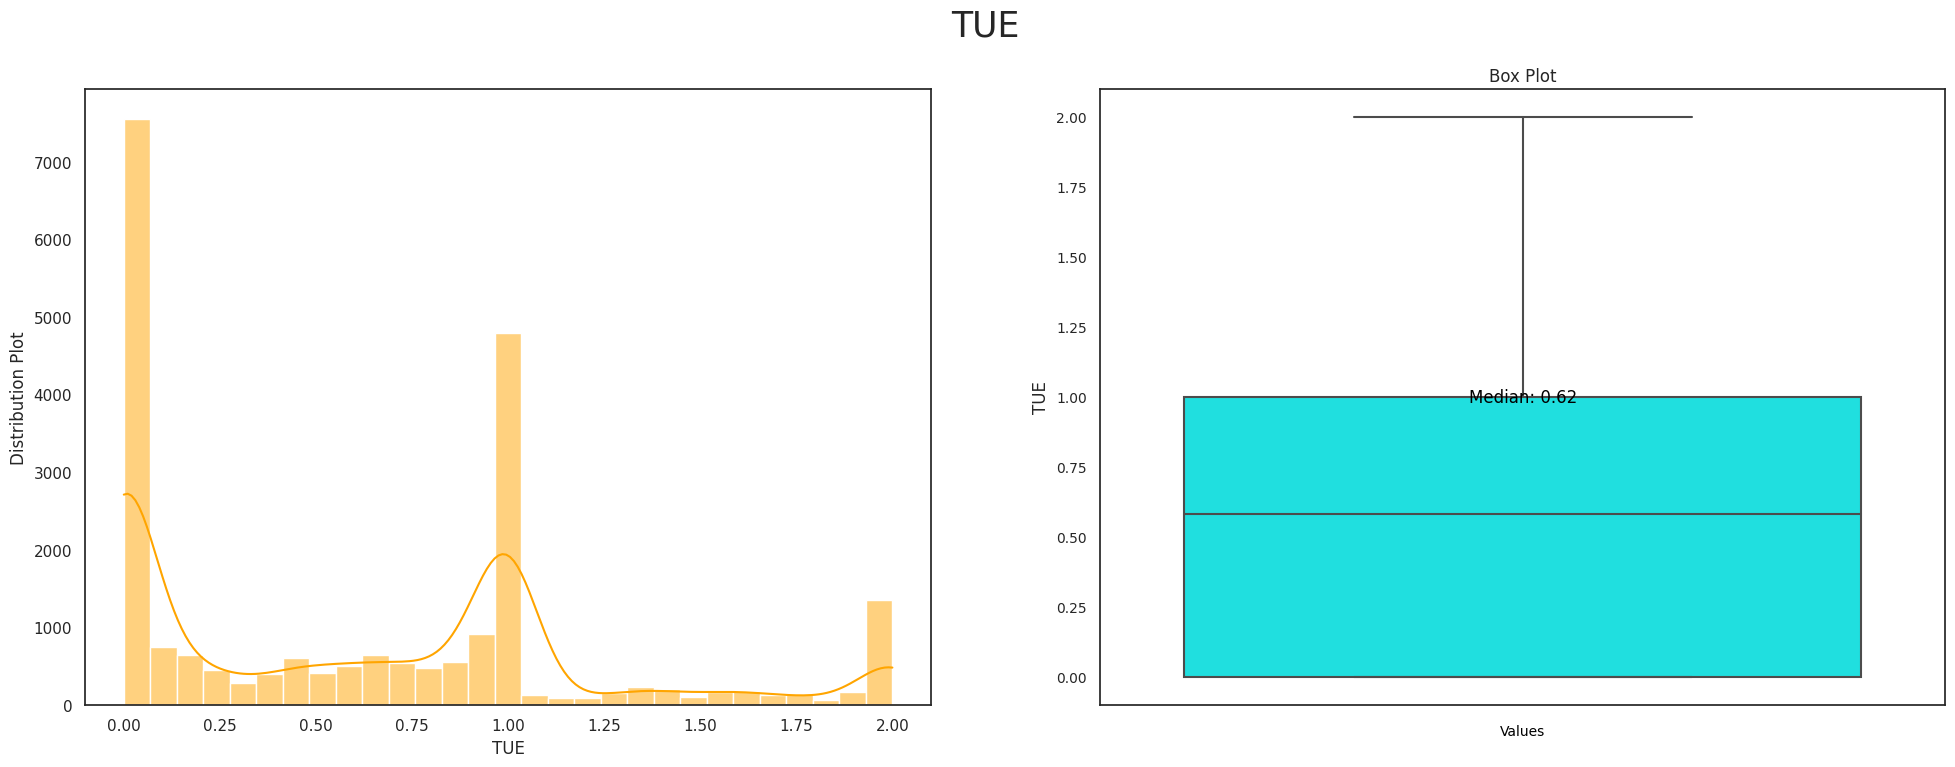

********************************************************************************************************************************************************************************************************


In [11]:
# This code gives EDA for whole Categorical columns of the data

num = data.select_dtypes(include=['float64']).columns

for i in num:
    f, ax = plt.subplots(1, 2, figsize=(24, 8))
    
    # Colors for the plots
    colors = ["orange", "cyan", "red", "grey", "indigo", "beige", "green"]
    rgb_colors = [mcolors.to_rgb(color) for color in colors]
    
    # Histplot (Distribution Plot)
    sns.histplot(data[i], ax=ax[0], color=colors[0], kde = True)
    ax[0].set_ylabel("Distribution Plot")
    
    # Boxplot
    sns.boxplot(y=i, data=data, ax=ax[1], color=rgb_colors[1])
    ax[1].set_xlabel("Values", fontsize=10, color="black")
    
    # Display median value 
    ax[1].annotate(f'Median: {data[i].mean():.2f}', 
                   xy=(0.5, 0.5), xycoords='axes fraction',
                   ha='center', va='center', fontsize=12, color='black')

    plt.yticks(rotation=0, fontsize=10)
    ax[1].set_title("Box Plot")
    plt.suptitle(i, size = 25)
    plt.show()
    print('*'*200)

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F13967881%2Fe5e14d896ea519e3b2fe4ba90a956ba8%2F0_y8AuUHSoTGRqX40h.jpg?generation=1705806626959794&alt=media)

# <a id = 8>BIVARIATE EDA
This Univariate is not enough

In [12]:
# Due to lack of information from uni we doing the bi but first let's convert our categorical data into numerical data by LabelEncoder
le = LabelEncoder()
# Measuring correlation function
def corr(data):
    col = data.select_dtypes(include=['object']).columns
    
    for i in col:
        data[i] = le.fit_transform(data[i])
        
    # Set up the matplotlib figure
    plt.figure(figsize=(22, 10))
    # Create a heatmap using Seaborn
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    # Set the title of the plot

    plt.title('Correlation Matrix of Features')
    

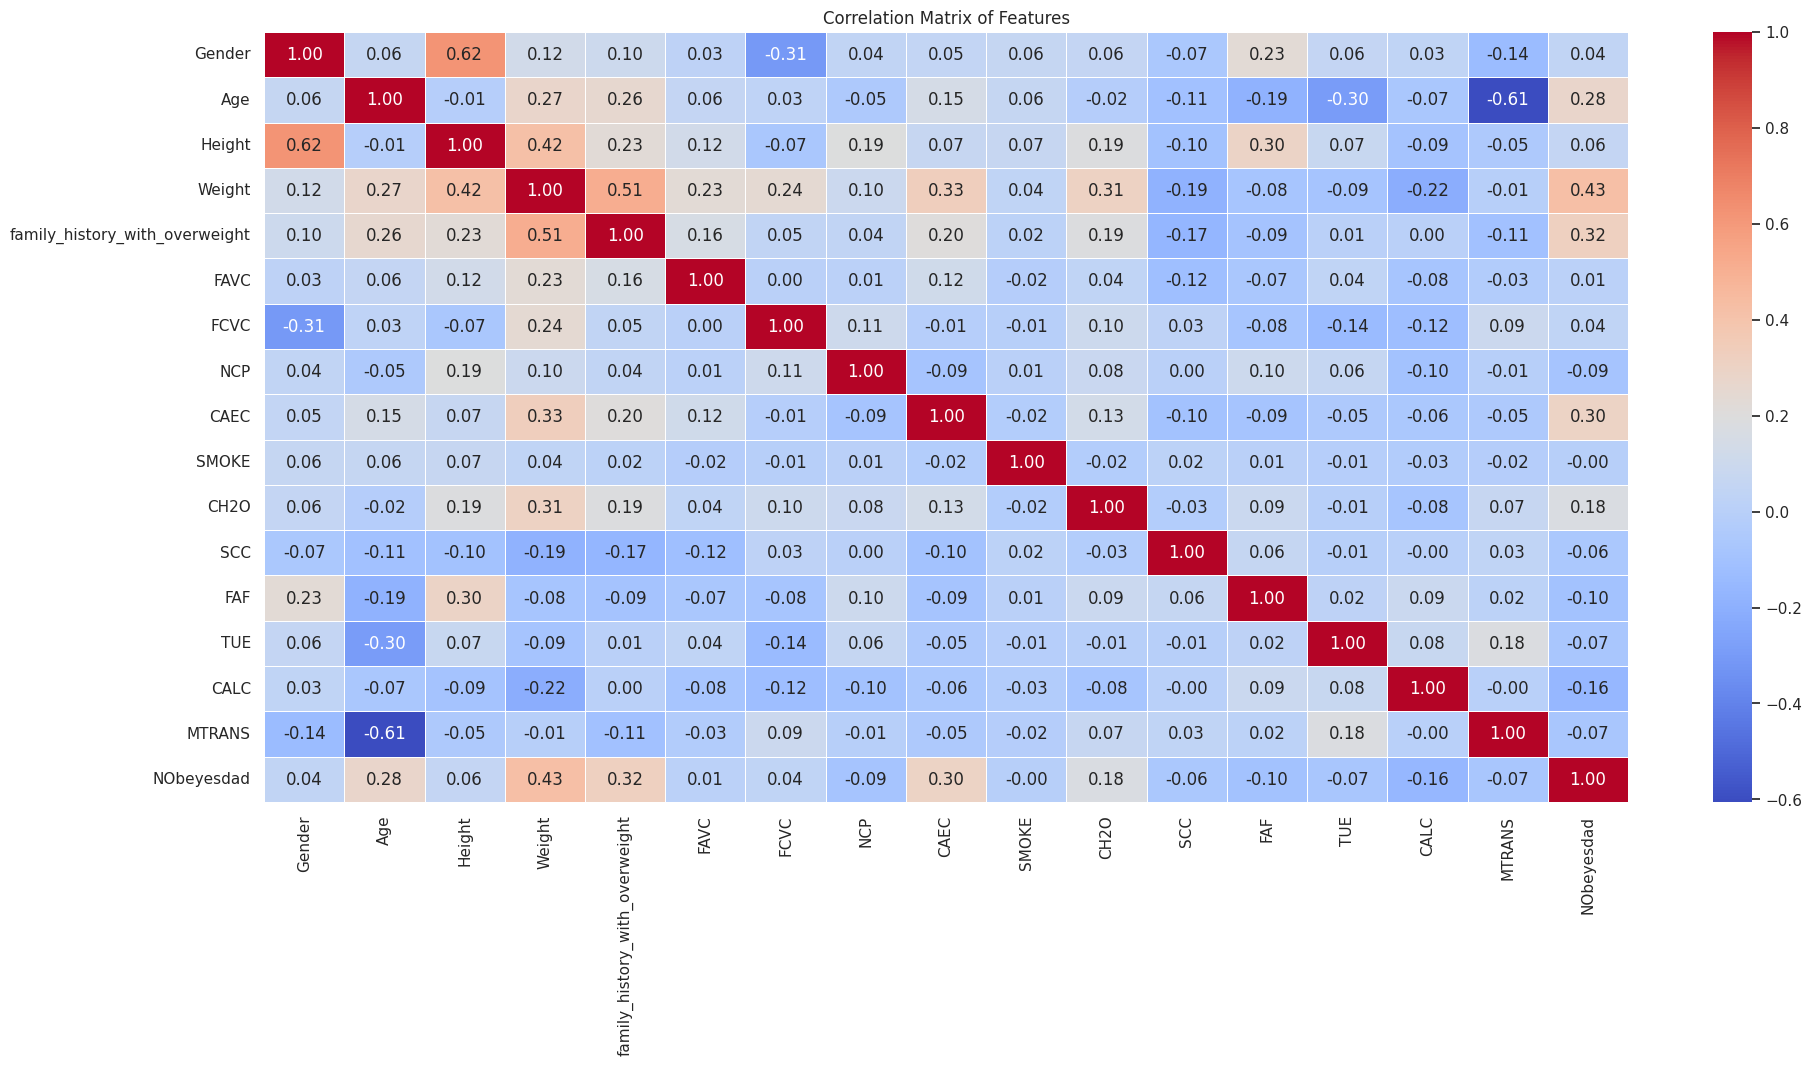

In [13]:
corr(data)

**WE are nice correlation with weight, Age,and family, etc , I'm plotting them also**

<Axes: xlabel='Weight', ylabel='NObeyesdad'>

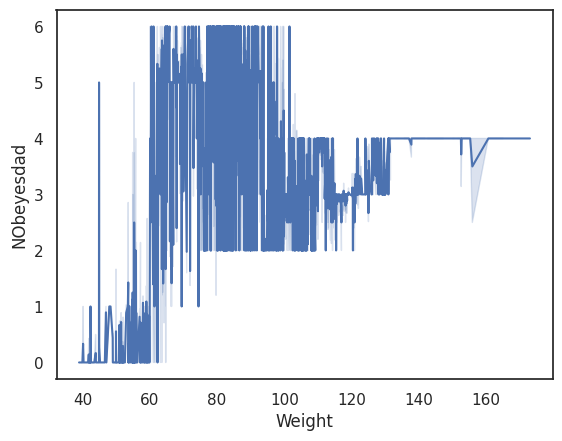

In [14]:
sns.lineplot(data = data , x ='Weight', y ='NObeyesdad')

# FOR more clarity
**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

**I'm checking correlation between two cat-cat columns, so using the heatmap with crosstab**

<Axes: xlabel='NObeyesdad', ylabel='family_history_with_overweight'>

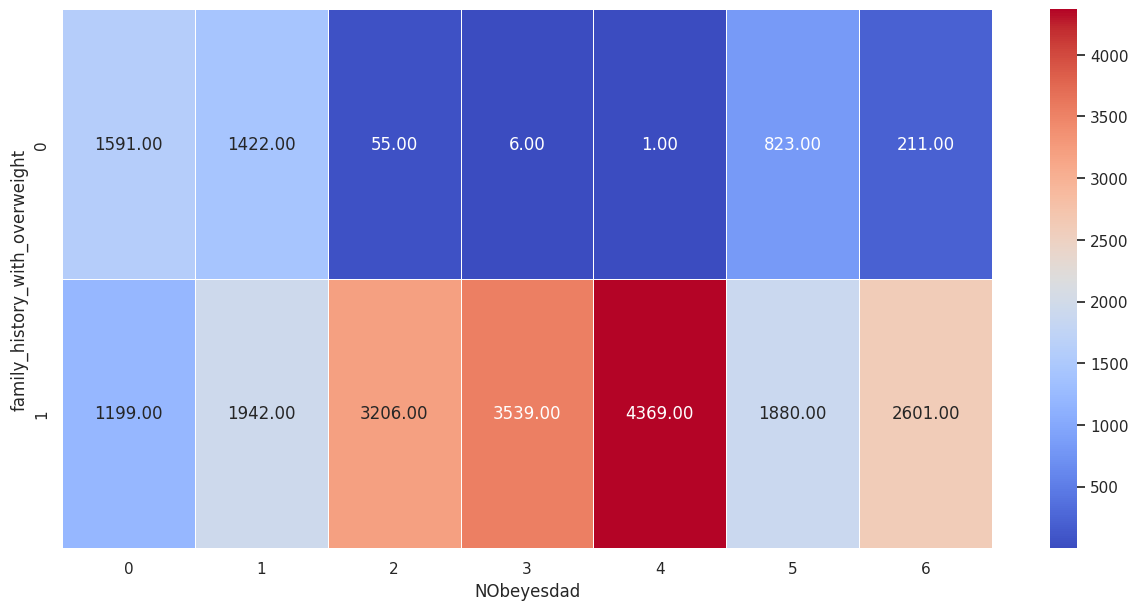

In [15]:
heat = pd.crosstab(data['family_history_with_overweight'], data['NObeyesdad'])

# Set up the matplotlib figure
plt.figure(figsize=(15, 7))
sns.heatmap(heat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# FOR more clarity
**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

*NEXT TRYING TO CAPTURE NON_LINEAR RELATION WITH MUTUAL INFORMATION*

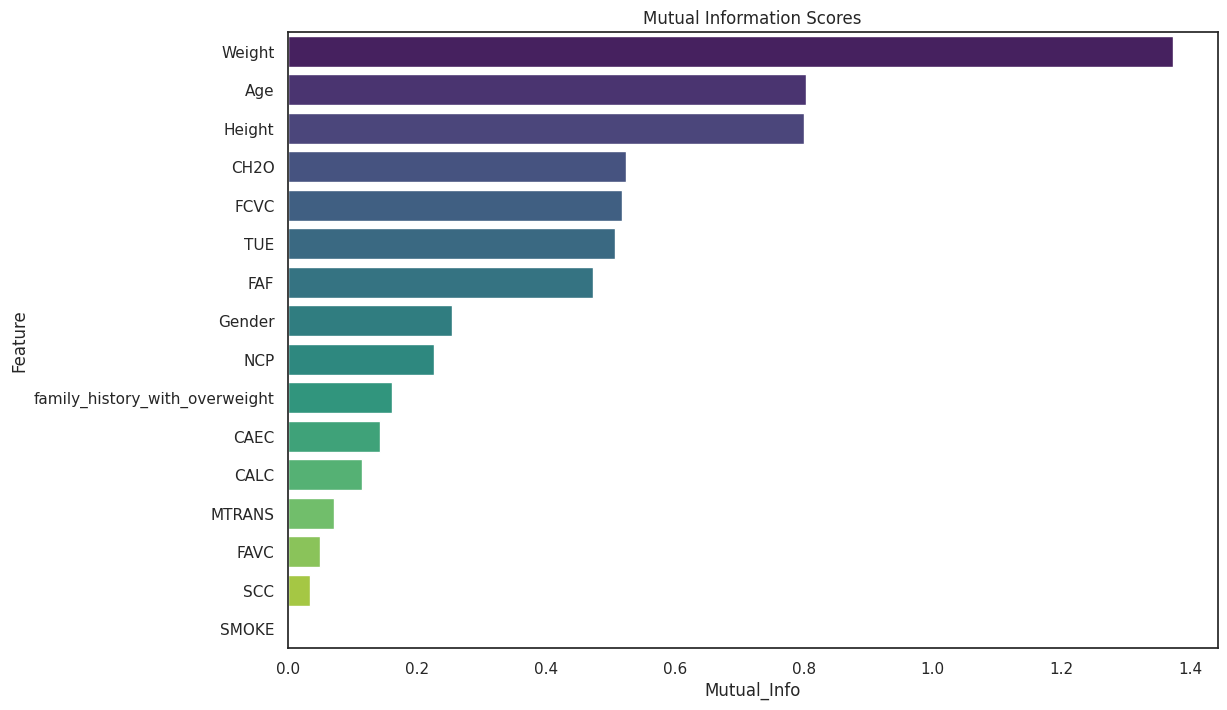

In [16]:
from sklearn.feature_selection import mutual_info_classif

X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

# Assuming X and y are defined as in your code
info = mutual_info_classif(X, y)

# Create a DataFrame to store the mutual information scores along with feature names
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': info})

# Sort the DataFrame by mutual information scores
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual_Info', y='Feature', data=mi_df, palette='viridis')
plt.title('Mutual Information Scores')
plt.show()

> HMmm.. Looks like we need to know relation between many more columns also now , since we get more information from mutual information

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F13967881%2Fe5e14d896ea519e3b2fe4ba90a956ba8%2F0_y8AuUHSoTGRqX40h.jpg?generation=1705806626959794&alt=media)
# <a id = 9>MULTIVARIATE EDA(BiVariate is not enough)

**TRYING TO CAPTURE RELATION BETWEEN WEIGHT, HEIGHT, GENDER AND TARGET(NOBEYESDAD)**

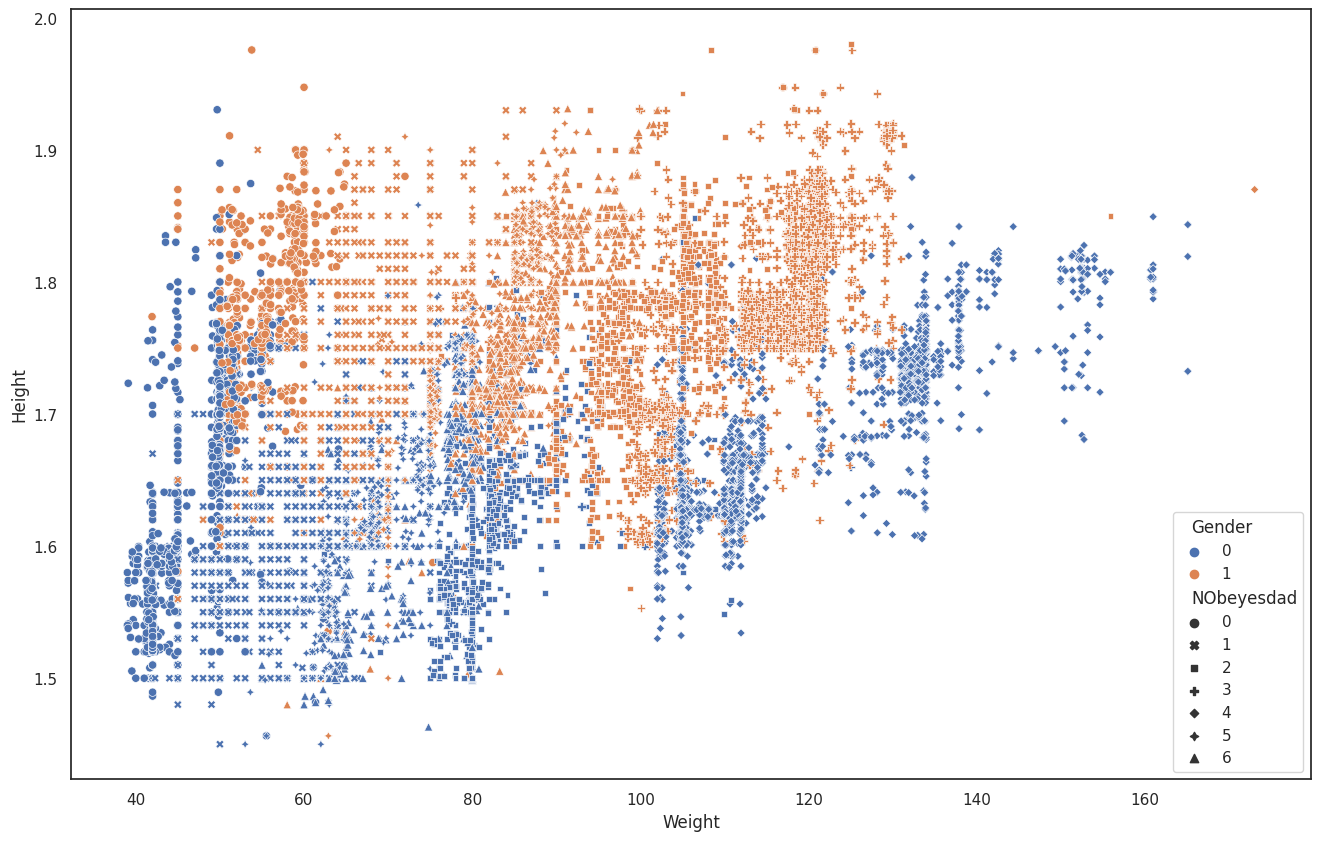

In [17]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = data, x = 'Weight', y = 'Height', hue = 'Gender', style='NObeyesdad')
plt.show()

# Need more clarity SO WE ARE USING 3d GRAPH

**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

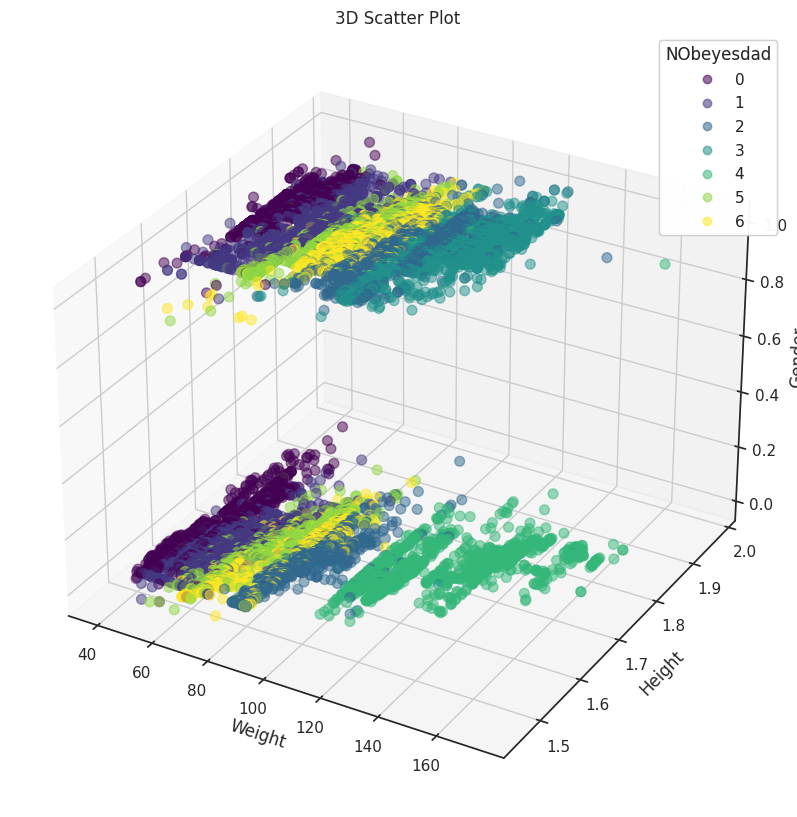

In [18]:
# SO WE ARE USING 3d GRAPH
from mpl_toolkits.mplot3d import Axes3D


# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x = 'Weight', y = 'Height', z = 'Age', hue = 'NObeyesdad'
scatter = ax.scatter(data['Weight'], data['Height'], data['Gender'], c=data['NObeyesdad'], marker='o', s=50, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Height')
ax.set_zlabel('Gender')
ax.set_title('3D Scatter Plot')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='NObeyesdad')
ax.add_artist(legend)

# Show the plot
plt.show()


# VERY CLEAR DIFFERENCE BETWEEN POINTS ,IT'S ALSO FEELS LIKE CLUSTERING CAN WORK, BUT WE ARE NOT GOING TO IT (BCOZ IT'S CLASSIFICATION TASK)
**TRYING TO CAPTURE RELATION BETWEEN AGE, CH2O, GENDER AND TARGET(NOBEYESDAD)**

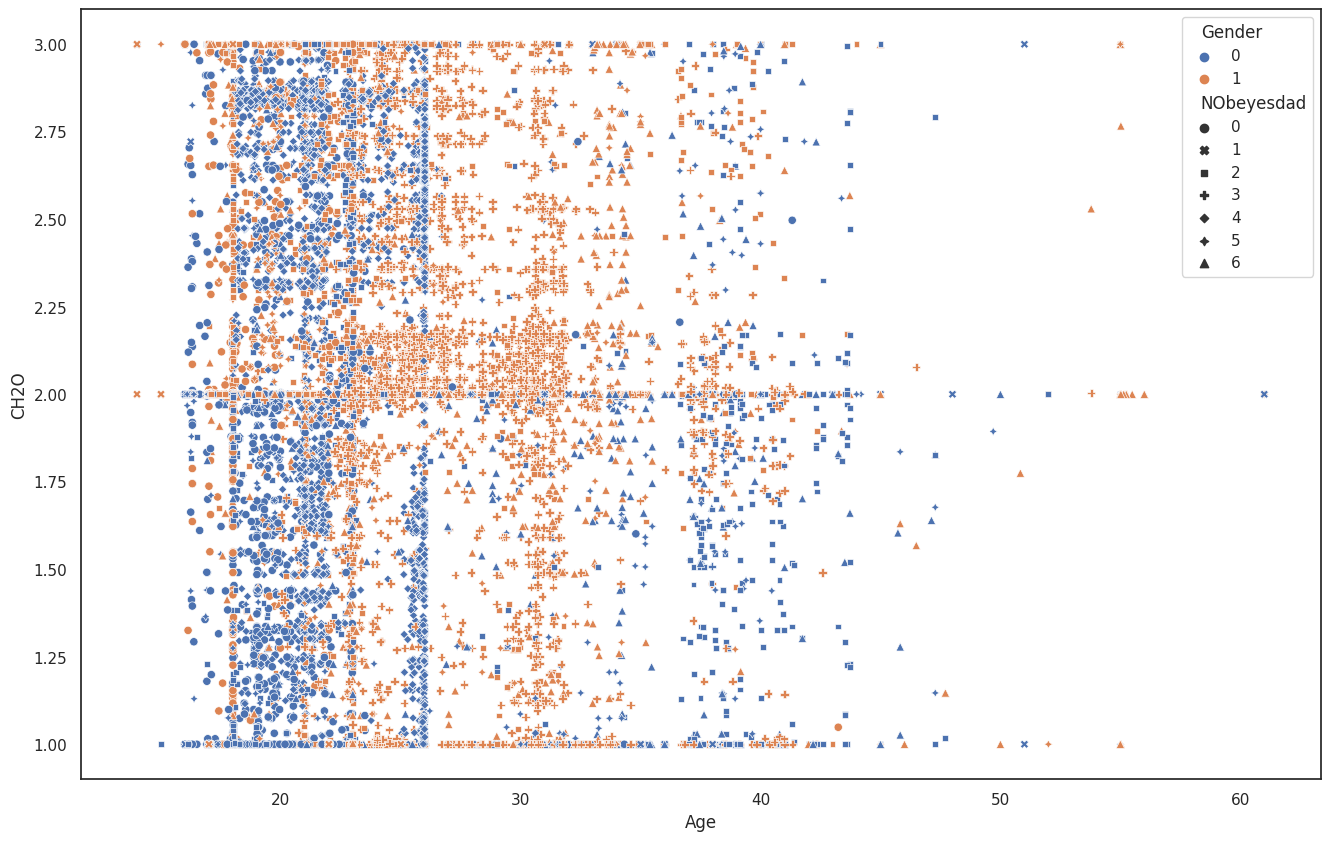

In [19]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = data, x = 'Age', y = 'CH2O', hue = 'Gender', style='NObeyesdad')
plt.show()

# Need more clarity SO WE ARE USING 3d GRAPH
**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

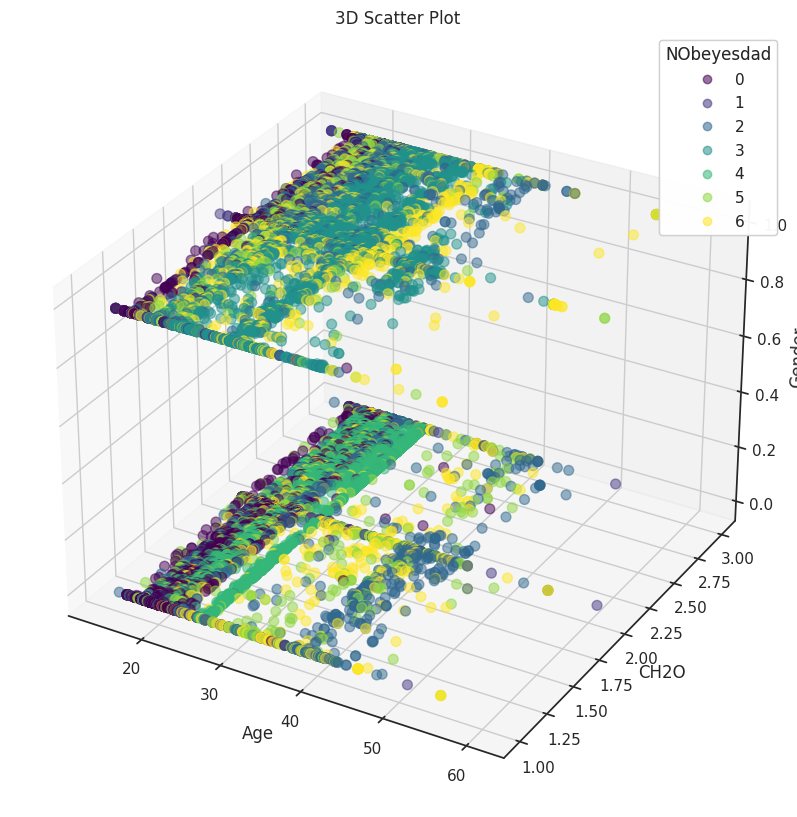

In [20]:
# SO WE ARE USING 3d GRAPH

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x = 'Weight', y = 'Height', z = 'Age', hue = 'NObeyesdad'
scatter = ax.scatter(data['Age'], data['CH2O'], data['Gender'], c=data['NObeyesdad'], marker='o', s=50, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('CH2O')
ax.set_zlabel('Gender')
ax.set_title('3D Scatter Plot')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='NObeyesdad')
ax.add_artist(legend)

# Show the plot
plt.show()


**TRYING TO CAPTURE RELATION BETWEEN AGE, FCVC, GENDER AND TARGET(NOBEYESDAD)**

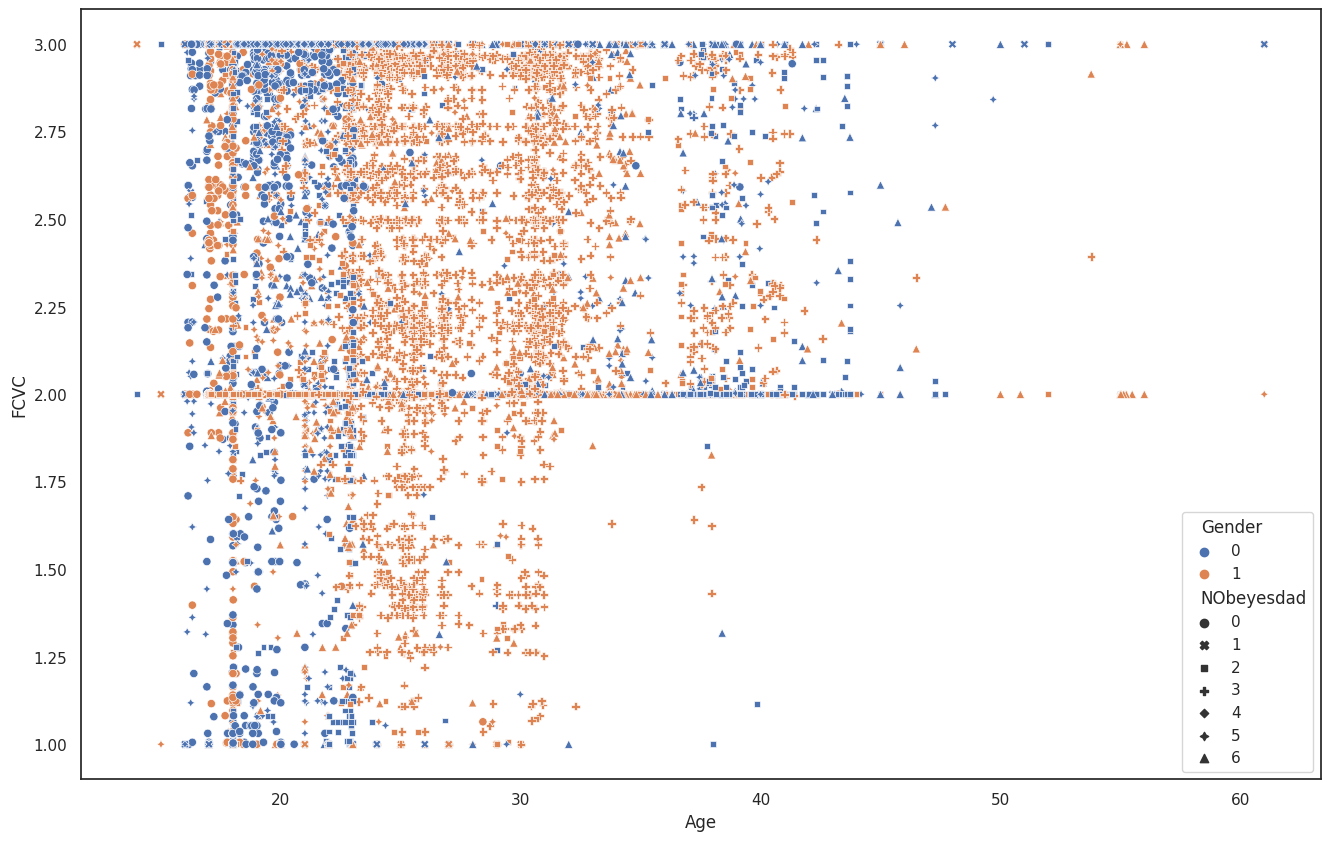

In [21]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = data, x = 'Age', y = 'FCVC', hue = 'Gender', style='NObeyesdad')
plt.show()

# Need more clarity SO WE ARE USING 3d GRAPH
**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

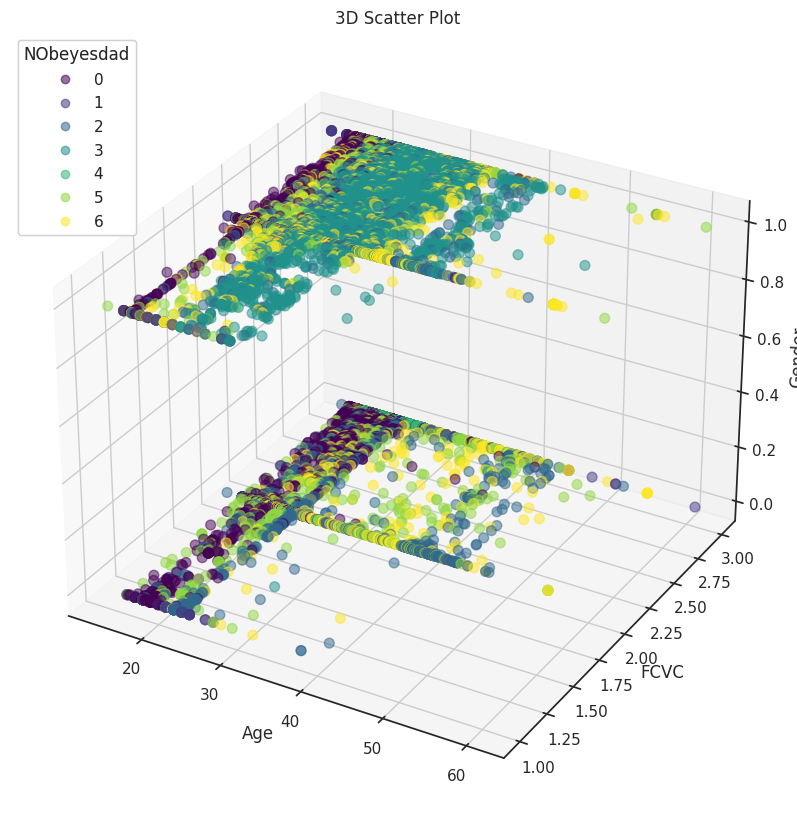

In [22]:
# SO WE ARE USING 3d GRAPH

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x = 'Weight', y = 'Height', z = 'Age', hue = 'NObeyesdad'
scatter = ax.scatter(data['Age'], data['FCVC'], data['Gender'], c=data['NObeyesdad'], marker='o', s=50, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('Age')
ax.set_ylabel('FCVC')
ax.set_zlabel('Gender')
ax.set_title('3D Scatter Plot')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='NObeyesdad')
ax.add_artist(legend)

# Show the plot
plt.show()


**TRYING TO CAPTURE RELATION BETWEEN TUE, FAF, GENDER AND TARGET(NOBEYESDAD)**

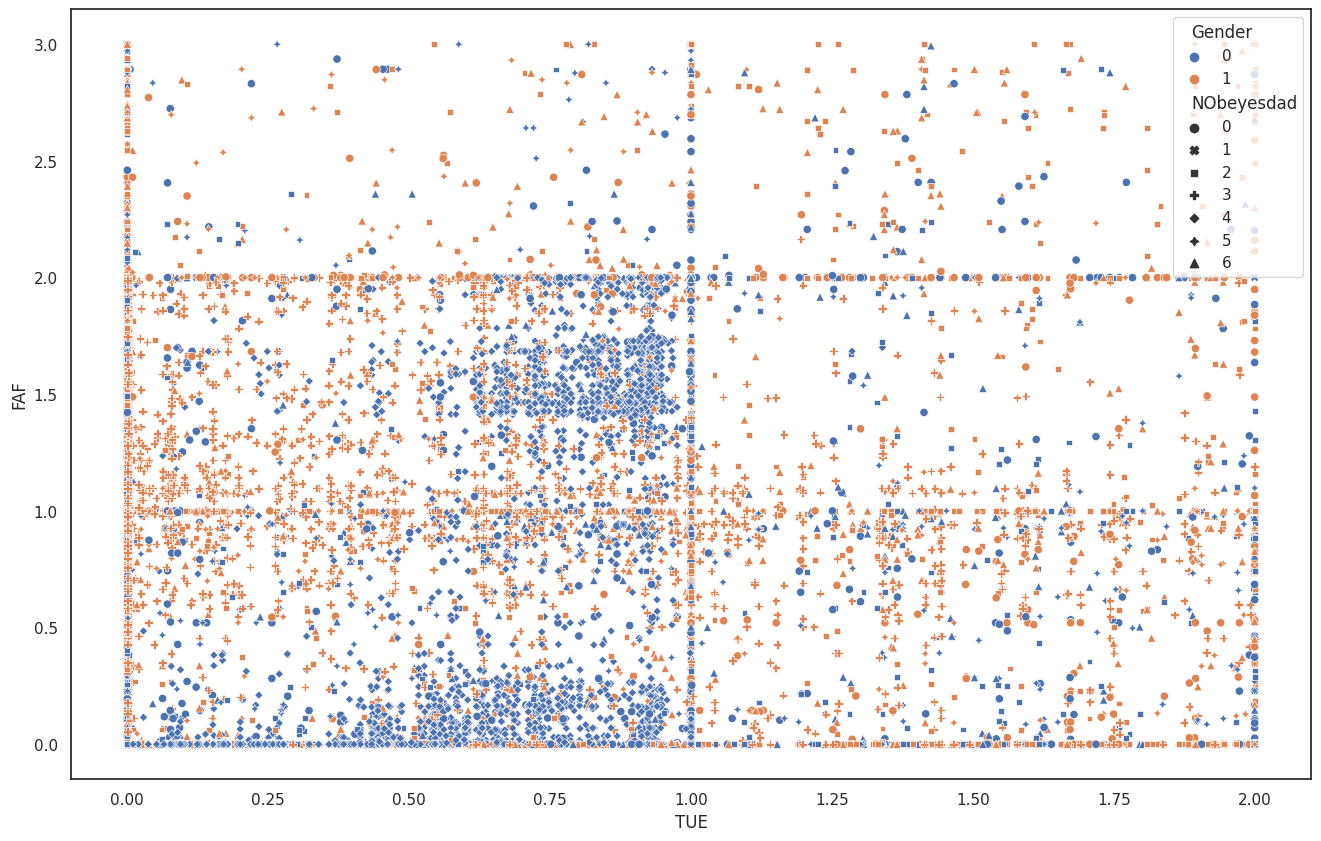

In [23]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data = data, x = 'TUE', y = 'FAF', hue = 'Gender', style='NObeyesdad')
plt.show()

# Need more clarity SO WE ARE USING 3d GRAPH
**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

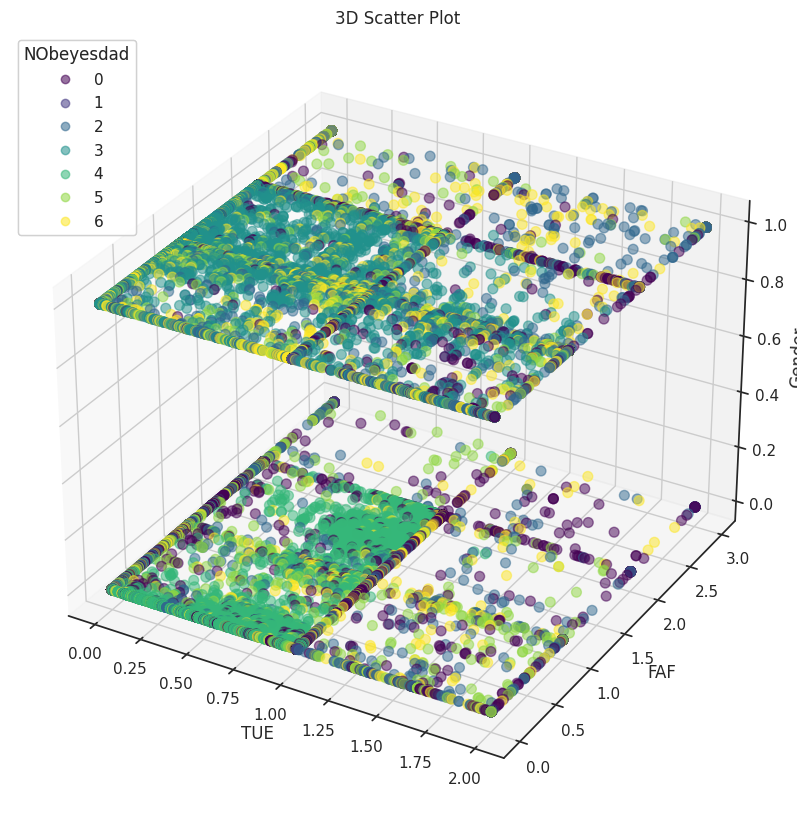

In [24]:
# SO WE ARE USING 3d GRAPH

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 14))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with x = 'Weight', y = 'Height', z = 'Age', hue = 'NObeyesdad'
scatter = ax.scatter(data['TUE'], data['FAF'], data['Gender'], c=data['NObeyesdad'], marker='o', s=50, cmap='viridis', alpha=0.5)

# Add labels and title
ax.set_xlabel('TUE')
ax.set_ylabel('FAF')
ax.set_zlabel('Gender')
ax.set_title('3D Scatter Plot')

# Add legend
legend = ax.legend(*scatter.legend_elements(), title='NObeyesdad')
ax.add_artist(legend)

# Show the plot
plt.show()


# WHAT YOU THINK WILL CLUSTERING WORK HERE LIKE KMEANS , DBSCAN , Gaussian Mixture Model, ETC AFTER SEEING SUCH CLEAR DIFF.. BETWEEN THINGS???COMMENT TO SHARE YOUR OPINION

**BARPLOT OF WEIGHT WITH TARGET**

<Axes: xlabel='NObeyesdad', ylabel='Weight'>

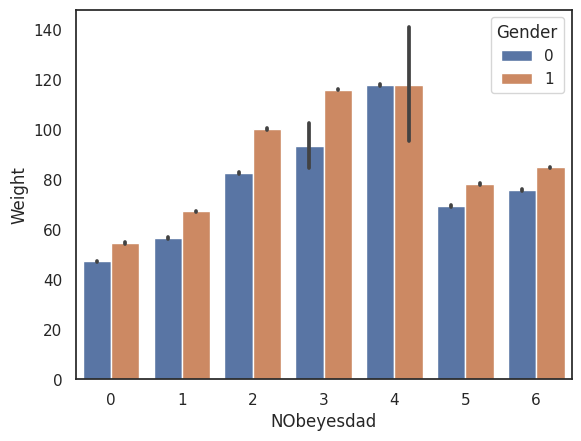

In [25]:
sns.barplot(data = data , x = 'NObeyesdad', y = 'Weight', hue = 'Gender')

**btw 0 = 'Insufficient_Weight', 1 = 'Normal_Weight', 2 = 'Obesity_Type_I', 3= 'Obesity_Type_II', 4 = 'Obesity_Type_III', 5 = 'Overweight_Level_I', 6 = 'Overweight_Level_II'**

<Axes: xlabel='NObeyesdad', ylabel='Height'>

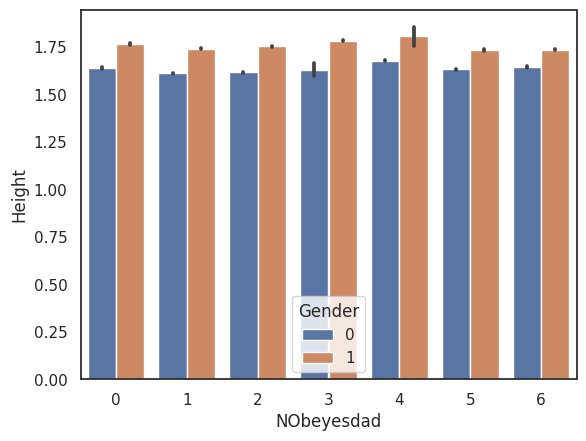

In [26]:
sns.barplot(data = data , x = 'NObeyesdad', y = 'Height', hue = 'Gender')

**Hmmm. I don't see any relationship between height and Nobeyesdad**

# <a id = 10>I went deep enough now
**ANd Time for being Lazy Developer I'm mean LazyPredict, also I'm not doing feature engineering right now**

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [01:29<00:01,  1.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2035
[LightGBM] [Info] Number of data points in the train set: 11422, number of used features: 16
[LightGBM] [Info] Start training from score -2.092661
[LightGBM] [Info] Start training from score -1.917939
[LightGBM] [Info] Start training from score -1.922718
[LightGBM] [Info] Start training from score -1.865692
[LightGBM] [Info] Start training from score -1.660814
[LightGBM] [Info] Start training from score -2.141380
[LightGBM] [Info] Start training from score -2.109841


100%|██████████| 29/29 [01:32<00:00,  3.18s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LGBMClassifier                     0.91               0.90    None      0.91   
XGBClassifier                      0.91               0.90    None      0.91   
RandomForestClassifier             0.90               0.89    None      0.90   
BaggingClassifier                  0.88               0.87    None      0.88   
ExtraTreesClassifier               0.88               0.87    None      0.88   
LogisticRegression                 0.86               0.85    None      0.86   
SVC                                0.86               0.85    None      0.86   
DecisionTreeClassifier             0.85               0.83    None      0.85   
LinearDiscriminantAnalysis         0.82               0.80    None      0.82   
NuSVC                              0.81               0.79    None      0.80   
ExtraTreeClassifier                0.80               0.79    None      0.80   
CalibratedClassifierCV             0.74               0.72    None      0.74   
KNeighborsClassifier               0.74               0.72    None      0.74   
LinearSVC                          0.74               0.71    None      0.72   
LabelPropagation                   0.73               0.71    None      0.73   
LabelSpreading                     0.73               0.71    None      0.73   
SGDClassifier                      0.71               0.68    None      0.69   
QuadraticDiscriminantAnalysis      0.61               0.64    None      0.57   
Perceptron                         0.65               0.62    None      0.65   
GaussianNB                         0.65               0.62    None      0.63   
BernoulliNB                        0.64               0.61    None      0.64   
NearestCentroid                    0.62               0.59    None      0.61   
RidgeClassifierCV                  0.62               0.59    None      0.58   
RidgeClassifier                    0.62               0.59    None      0.58   
PassiveAggressiveClassifier        0.62               0.58    None      0.62   
AdaBoostClassifier                 0.41               0.41    None      0.26   
DummyClassifier                    0.19               0.14    None      0.06   

                               Time Taken  
Model                                      
LGBMClassifier                       2.62  
XGBClassifier                        2.64  
RandomForestClassifier               2.16  
BaggingClassifier                    0.58  
ExtraTreesClassifier                 1.79  
LogisticRegression                   1.34  
SVC                                  5.95  
DecisionTreeClassifier               0.12  
LinearDiscriminantAnalysis           0.20  
NuSVC                               15.35  
ExtraTreeClassifier                  0.06  
CalibratedClassifierCV              18.19  
KNeighborsClassifier                 1.16  
LinearSVC                            4.74  
LabelPropagation                    10.46  
LabelSpreading                      21.92  
SGDClassifier                        0.48  
QuadraticDiscriminantAnalysis        0.24  
Perceptron                           0.20  
GaussianNB                           0.05  
BernoulliNB                          0.14  
NearestCentroid                      0.16  
RidgeClassifierCV                    0.25  
RidgeClassifier                      0.15  
PassiveAggressiveClassifier          0.25  
AdaBoostClassifier                   0.82  
DummyClassifier                      0.04

# <a id = 11> REFERENCES

- REAL INSPIRATION FOR BEAUTIUL CODE BLOCK:- [HERE](https://www.kaggle.com/thomasmeiner)
- MY PREVIOUS WORK:- [HERE](https://www.kaggle.com/code/luficergfree/it-s-me-luficer-g)